In [1]:
import sys
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
from matplotlib.colors import to_rgba
sys.path.append('../scripts/')
import assembly_tree as at
from tqdm import tqdm

In [2]:
# Read in example protein
protein = nx.read_edgelist('../data/protein_complex/proteins/human/edgefiles/CPX-1919.edge',nodetype=int)
X = np.loadtxt('../data/protein_complex/proteins/human/Xfiles/X_CPX-1919.txt')
O = np.array([[0,1,1],[1,0,1],[1,1,2]])

In [3]:
nx.set_edge_attributes(protein,1,'capacity')

In [4]:
protein.edges(data=True)

EdgeDataView([(0, 1, {'capacity': 1}), (0, 2, {'capacity': 1}), (1, 2, {'capacity': 1}), (2, 3, {'capacity': 1}), (2, 9, {'capacity': 1}), (3, 5, {'capacity': 1}), (3, 4, {'capacity': 1}), (3, 11, {'capacity': 1}), (9, 7, {'capacity': 1}), (9, 8, {'capacity': 1}), (9, 16, {'capacity': 1}), (5, 4, {'capacity': 1}), (11, 6, {'capacity': 1}), (11, 10, {'capacity': 1}), (11, 14, {'capacity': 1}), (6, 10, {'capacity': 1}), (7, 8, {'capacity': 1}), (16, 14, {'capacity': 1}), (16, 15, {'capacity': 1}), (16, 17, {'capacity': 1}), (14, 12, {'capacity': 1}), (14, 13, {'capacity': 1}), (12, 13, {'capacity': 1}), (15, 17, {'capacity': 1})])

In [5]:
at.create_disassembly_tree(protein,X,O,O.sum(axis=1))

(<treelib.tree.Tree at 0x1203a0550>,
 {0: 996, 1: 4, 2: 4, 3: 4, 4: 4, 5: 4, 6: 4},
 {0: [0, 1, 2, 3, 9, 5, 4, 11, 6, 10, 7, 8, 16, 14, 12, 13, 15, 17],
  1: {0, 1, 2},
  2: {3, 4, 5},
  3: {7, 8, 9},
  4: {6, 10, 11},
  5: {15, 16, 17},
  6: {12, 13, 14}})

In [8]:
at.approx_assembly_tree(protein,X,O,O.sum(axis=1))

ValueError: Number of nodes and labels do not match.

In [83]:
g = nx.read_edgelist('../data/CID_2345.txt',nodetype=int,create_using=nx.MultiGraph)
X = np.loadtxt('../data/X_2345.txt')

In [84]:
X

array([[1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.]])

In [89]:
O = at.extract_O(g,X)

In [86]:
nx.set_edge_attributes(g,1,'capacity')
g.edges(data=True)

MultiEdgeDataView([(0, 2, {'capacity': 1}), (0, 3, {'capacity': 1}), (0, 16, {'capacity': 1}), (2, 6, {'capacity': 1}), (2, 18, {'capacity': 1}), (3, 7, {'capacity': 1}), (3, 19, {'capacity': 1}), (1, 4, {'capacity': 1}), (1, 5, {'capacity': 1}), (1, 17, {'capacity': 1}), (4, 8, {'capacity': 1}), (4, 20, {'capacity': 1}), (5, 9, {'capacity': 1}), (5, 21, {'capacity': 1}), (6, 11, {'capacity': 1}), (6, 22, {'capacity': 1}), (7, 11, {'capacity': 1}), (7, 23, {'capacity': 1}), (8, 12, {'capacity': 1}), (8, 24, {'capacity': 1}), (9, 12, {'capacity': 1}), (9, 25, {'capacity': 1}), (11, 10, {'capacity': 1}), (12, 13, {'capacity': 1}), (10, 15, {'capacity': 1}), (10, 26, {'capacity': 1}), (10, 27, {'capacity': 1}), (15, 13, {'capacity': 1}), (13, 14, {'capacity': 1})])

color_idx = X.argmax(axis=1)
color_key = np.array([to_rgba('b'),to_rgba('r'),to_rgba('gold')])


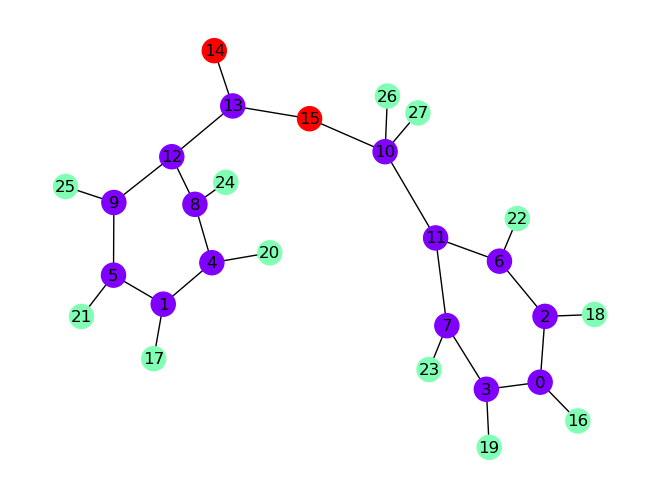

In [88]:
at.draw_network(g,X,with_labels=True)

In [24]:
tree, stability, nodes =  at.create_disassembly_tree(g,X,O,O.sum(axis=1))

In [ ]:
p, samples, idx = at.prob_dist(X,O,O.sum(axis=1),max_iters=1000,verbose=True,multiedge=True)

  4%|▍         | 44/1000 [20:39<7:34:28, 28.52s/it]

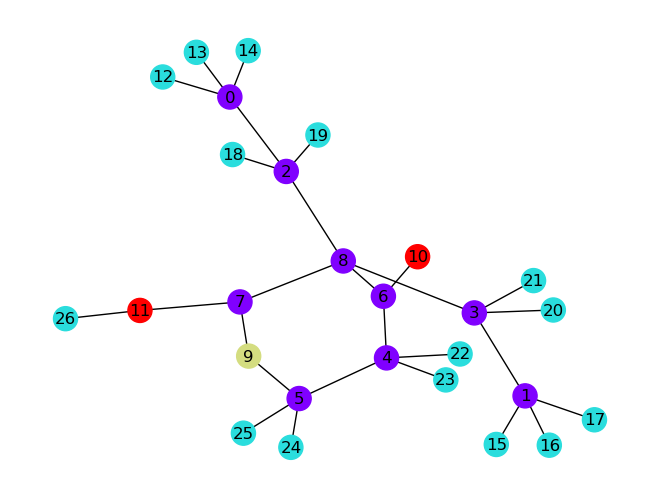

In [34]:
at.draw_network(g,X,with_labels=True)

In [31]:
nodes[2]

{6, 10, 13}

In [161]:
len(sample_space)

16

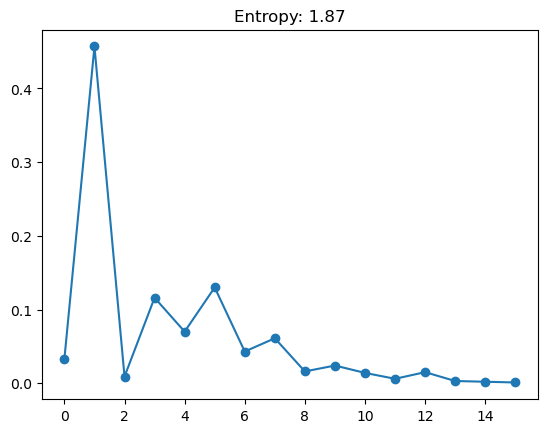

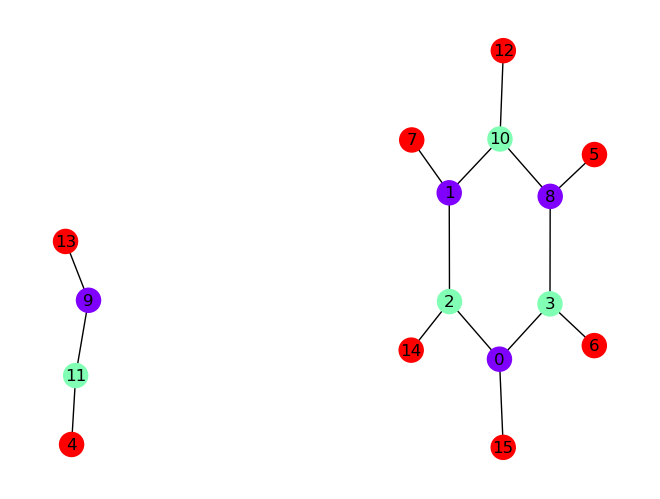

In [ ]:
plt.plot(np.arange(len(sample_space)),p,'-o')
plt.title(f'Entropy: {at.entropy(p):.2f}')
plt.show() 
at.draw_network(sample_space[np.argsort(p)[-5]],X,with_labels=True)
plt.show()

In [3]:
X = np.array([[1,0,0],[1,0,0],[1,0,0],[1,0,0],[1,0,0],[1,0,0],
              [0,1,0],[0,1,0],[0,1,0],[0,1,0],
              [0,0,1],[0,0,1]])
O = np.array([[0,2,2],[2,0,1],[5,2,0]])
capacity = O.sum(axis=1)

In [6]:
A = np.zeros((len(X),len(X),100))
for i in tqdm(range(100)):
    g = at.microcanonical_ensemble(X,O,[3,3,1],T=100000,kappa_a=1,kappa_d=0.01,multiedge=False)
    A[:,:,i] = nx.to_numpy_array(g)


  0%|          | 0/100 [00:00<?, ?it/s]

100%|██████████| 100/100 [01:17<00:00,  1.30it/s]


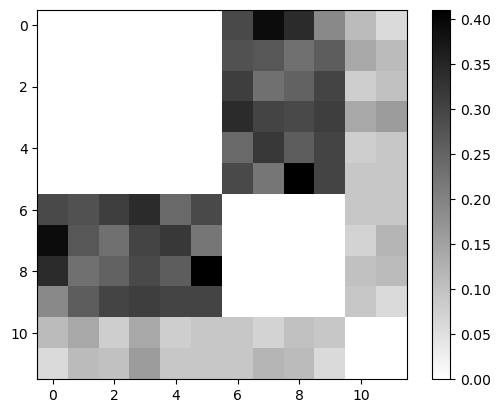

In [9]:
plt.imshow(A[:,:,:1000].mean(axis=2),cmap='binary')
plt.colorbar()

In [8]:
np.min([O[0,1],O[0,1]]) / np.max([X.sum(axis=0)[0],X.sum(axis=0)[1]])

0.3333333333333333

In [98]:
O[0,],O[2,0], X.sum(axis=0)[0],X.sum(axis=0)[2]

(2, 5, 6, 2)

In [10]:
A[0,2,:].mean()

0.0

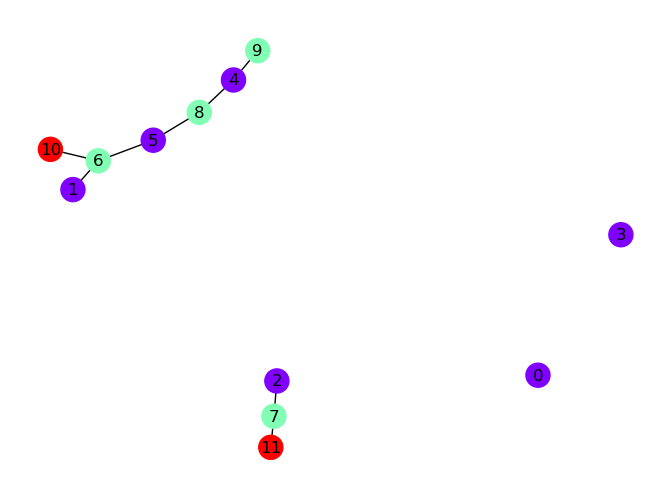

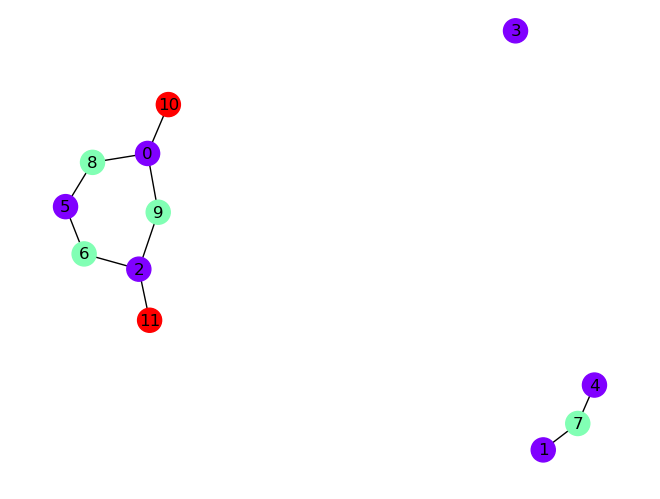

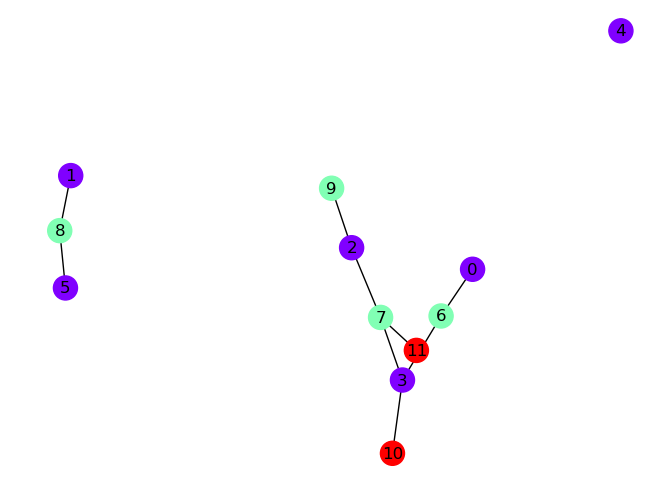

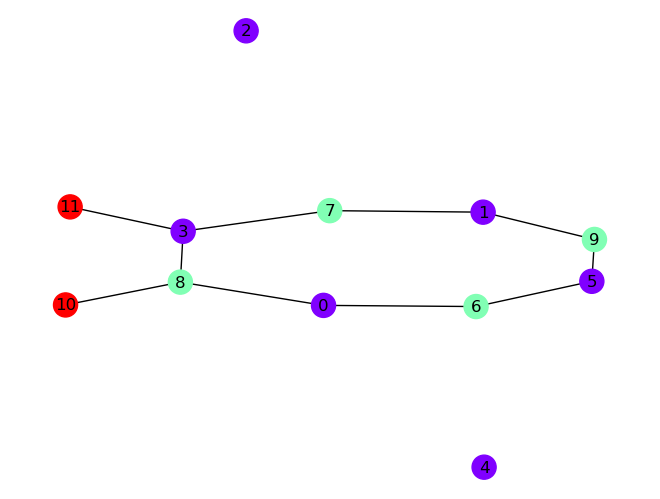

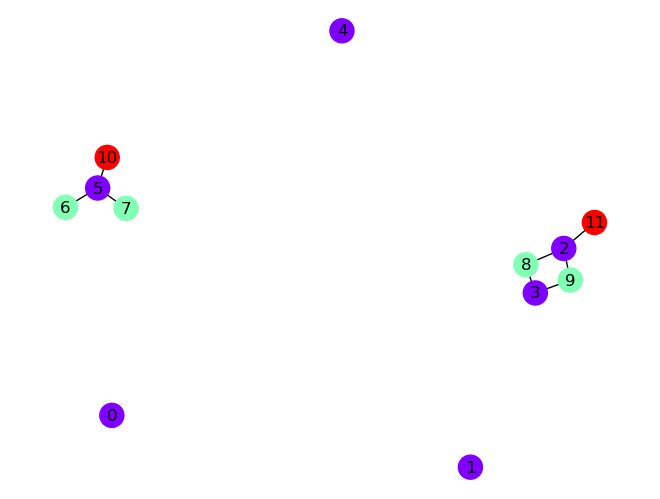

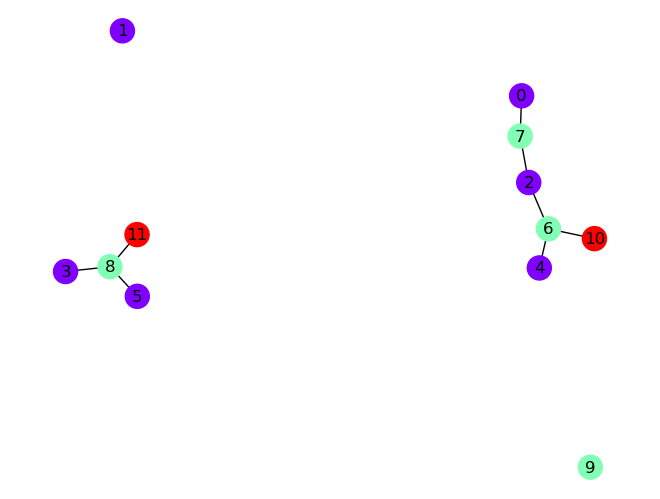

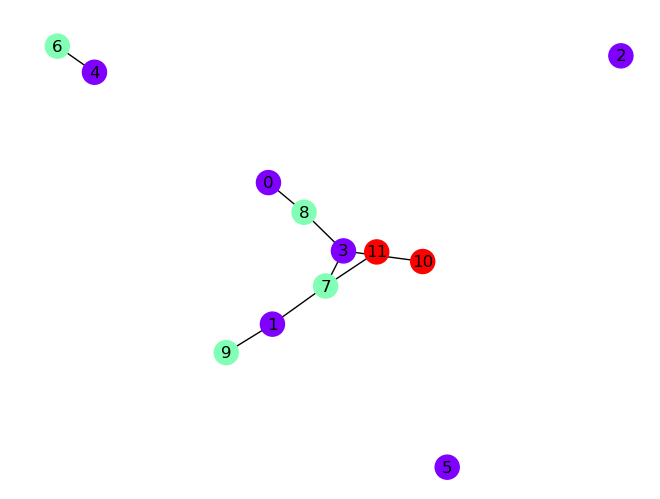

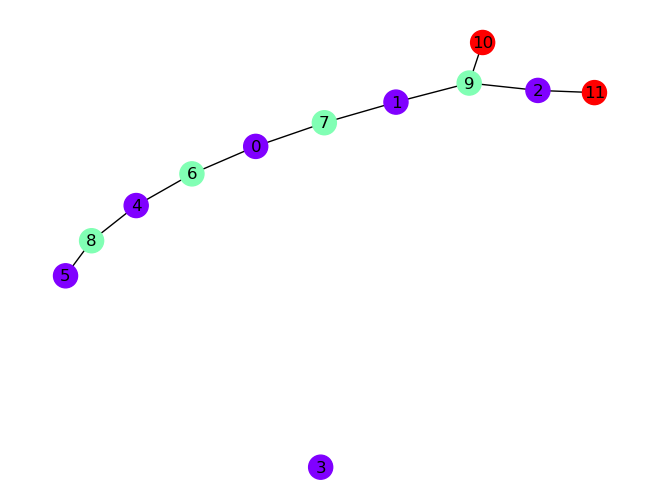

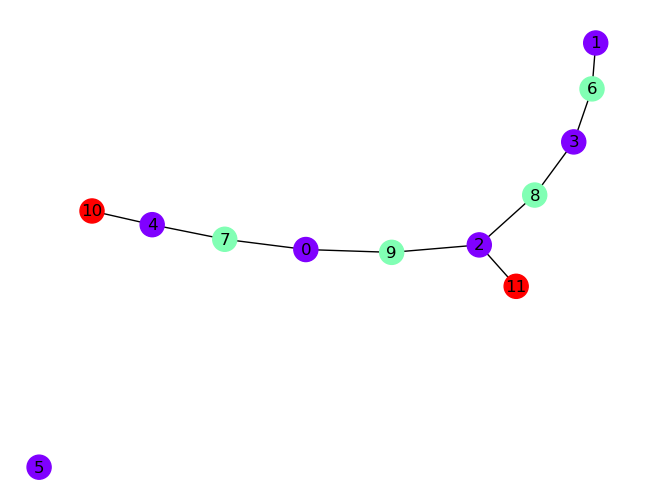

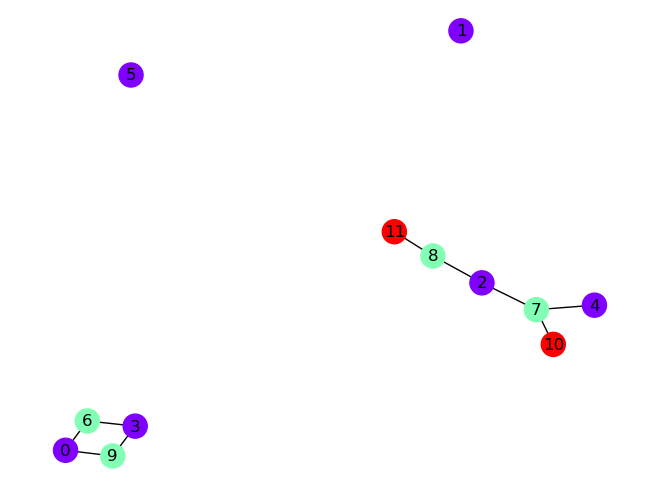

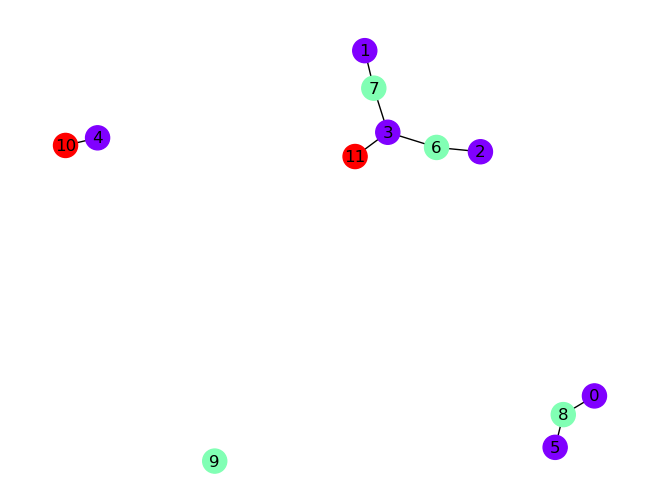

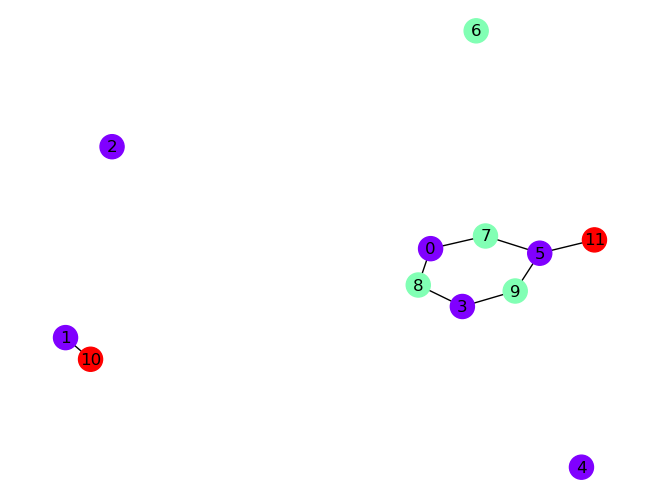

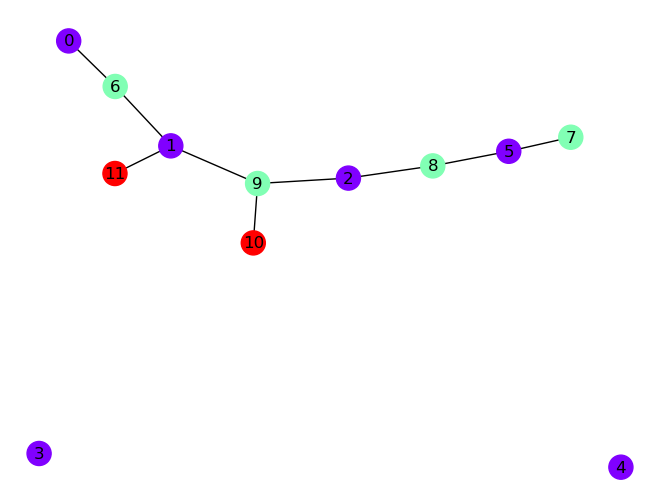

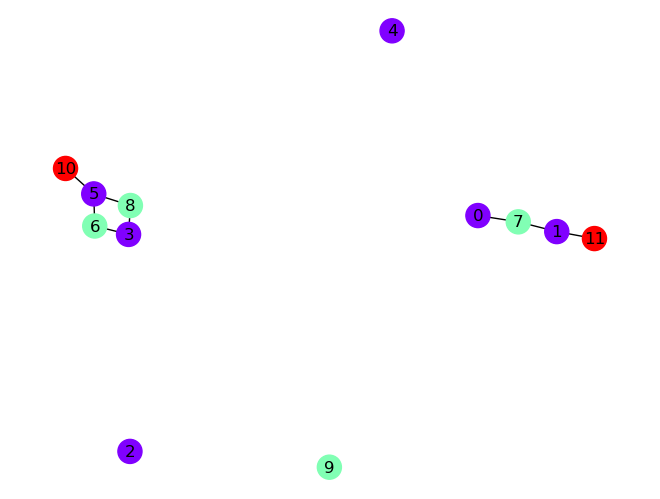

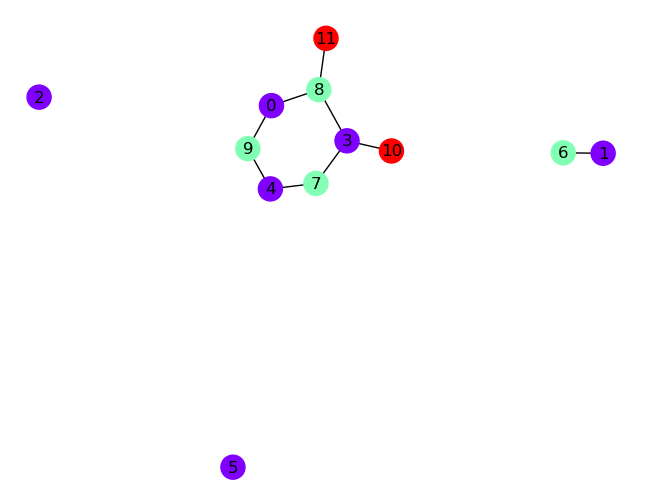

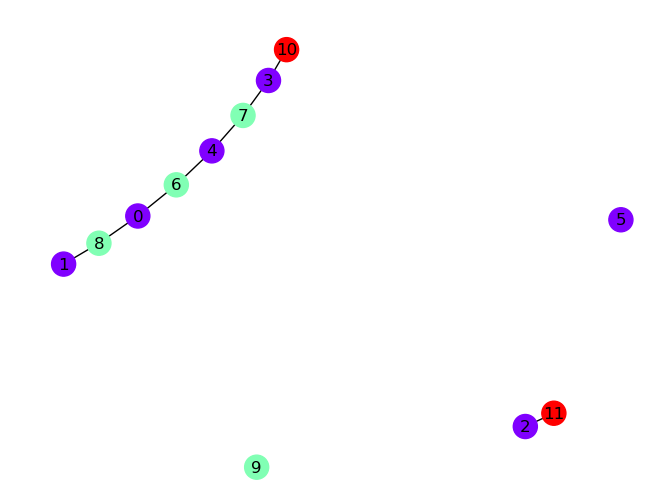

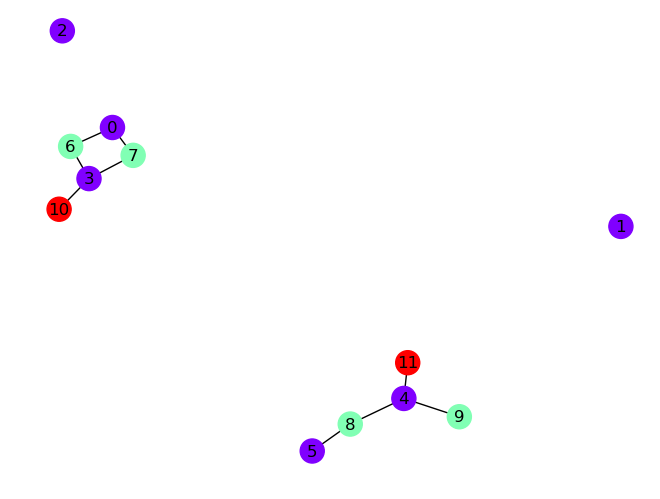

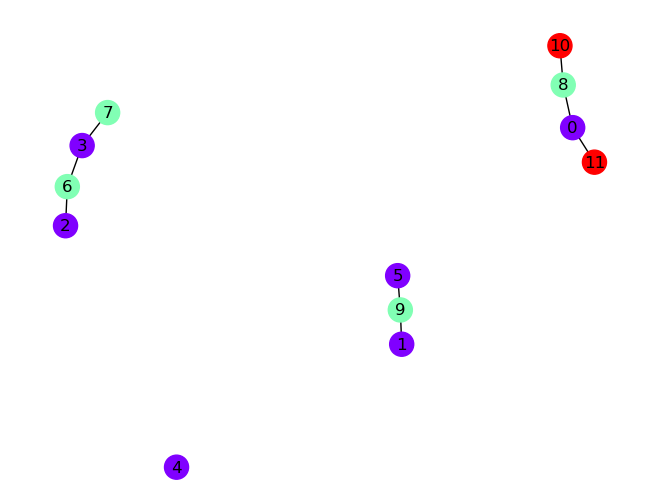

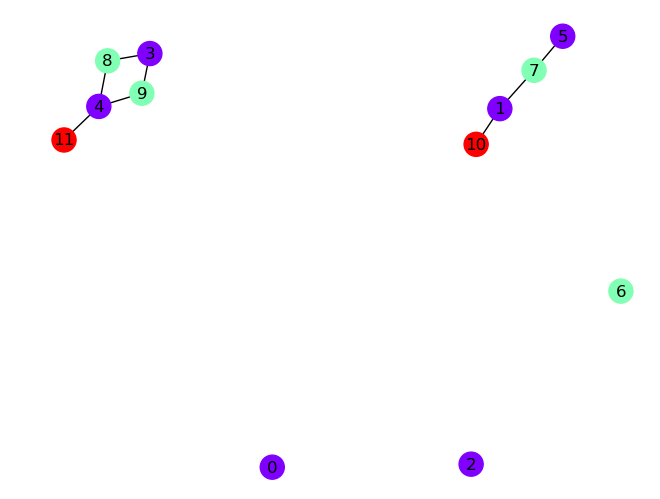

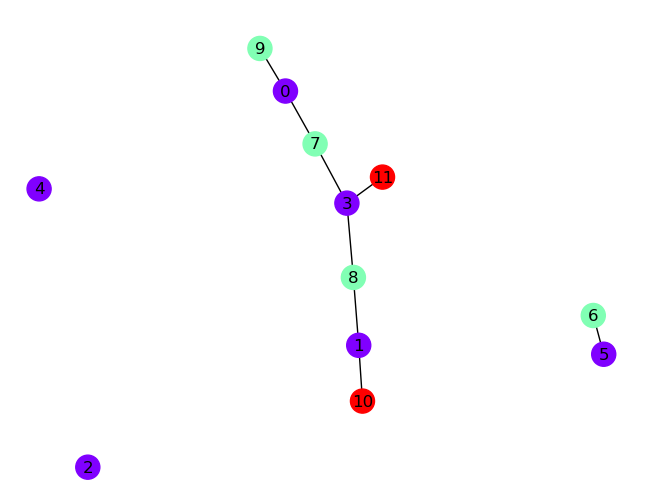

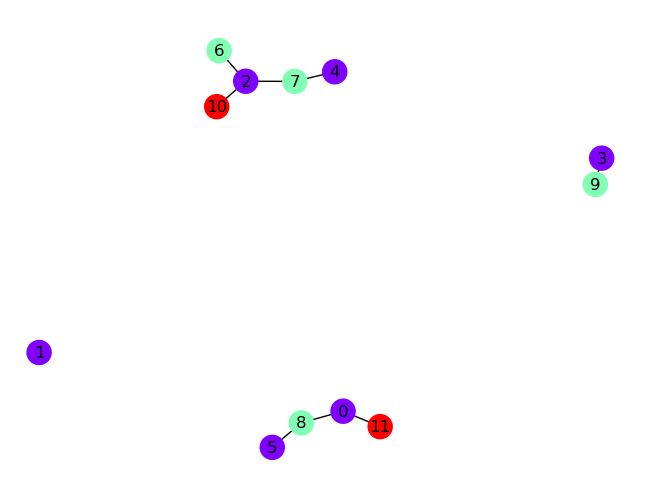

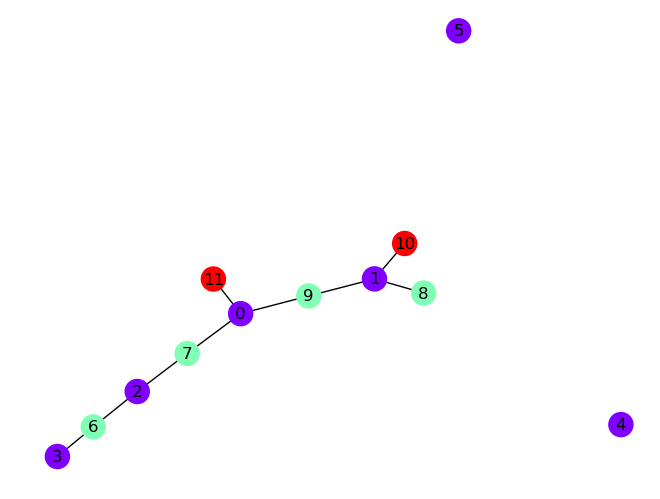

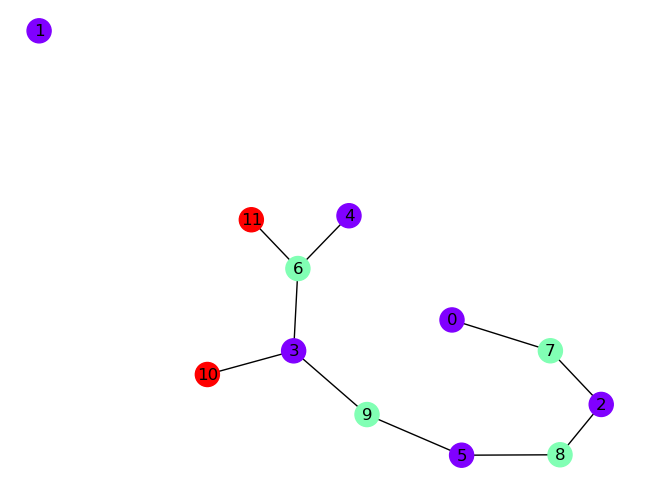

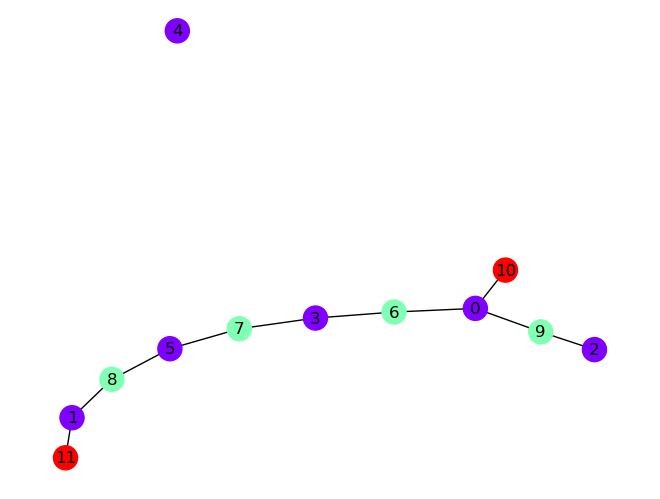

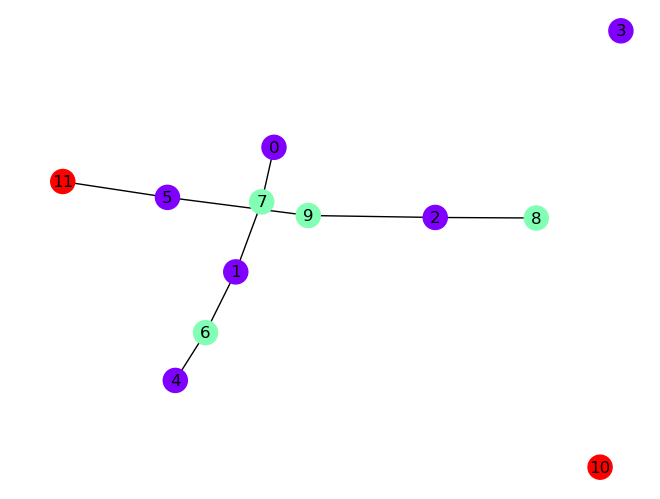

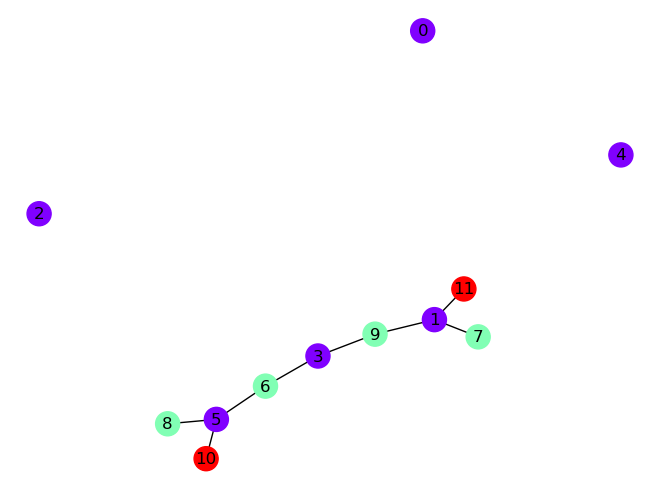

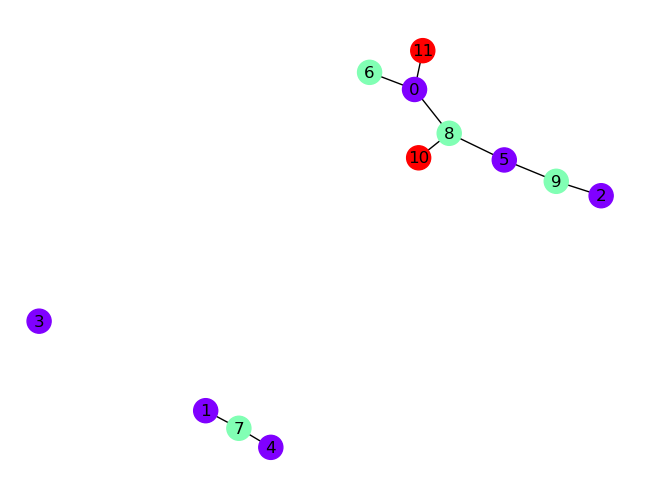

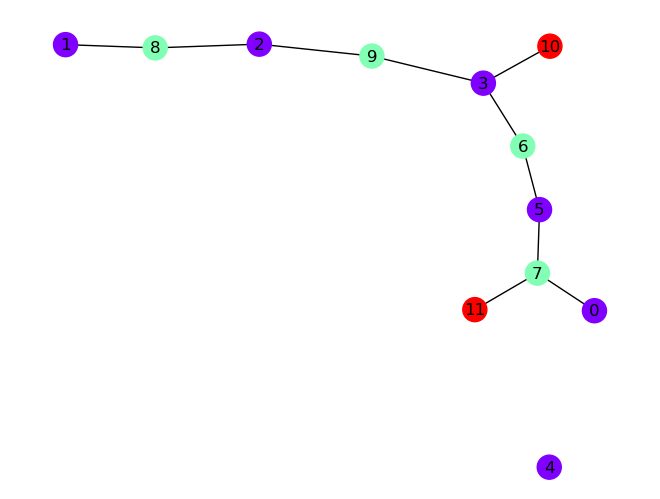

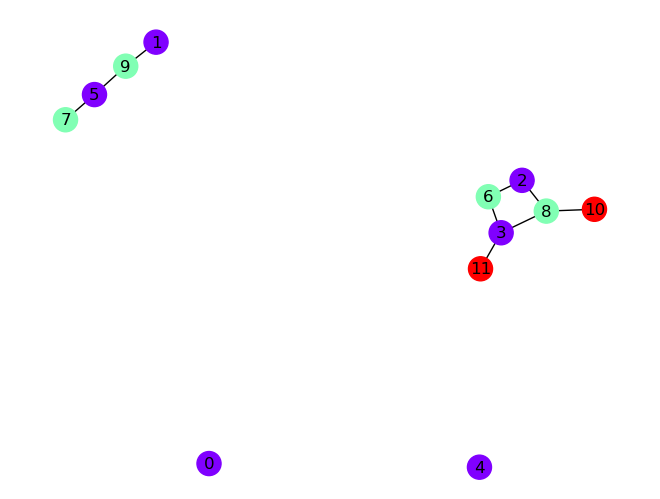

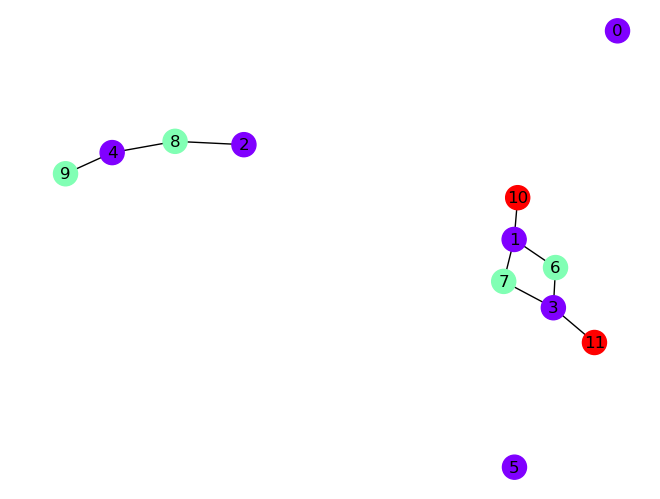

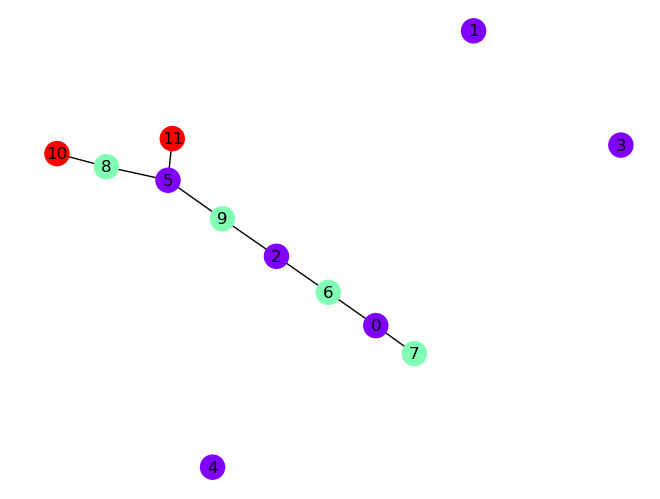

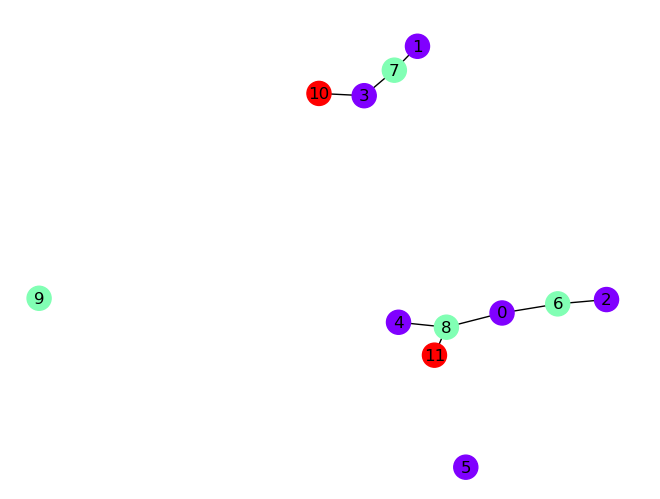

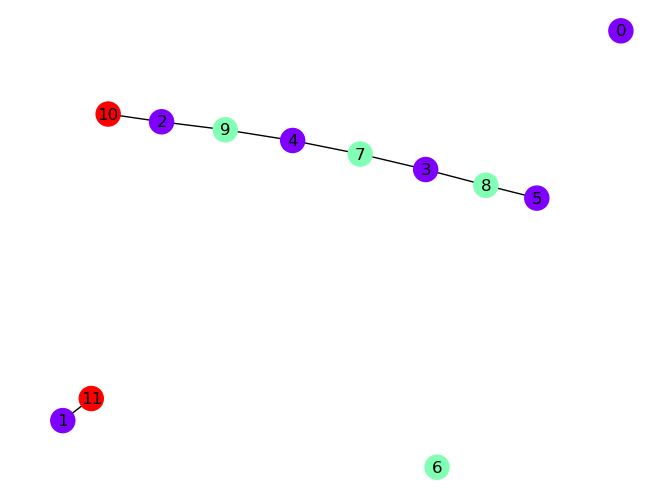

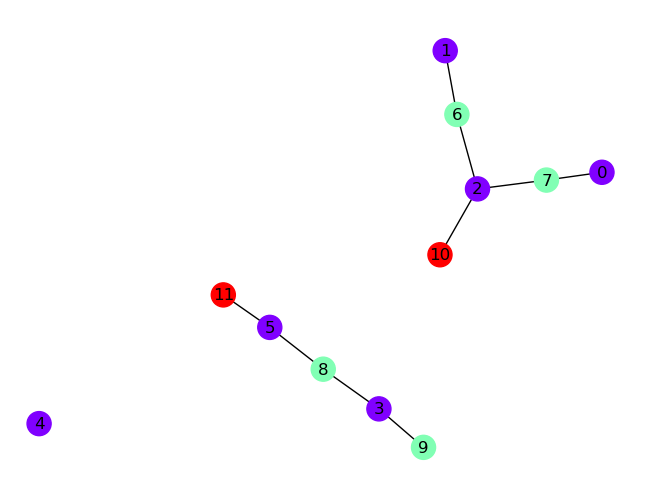

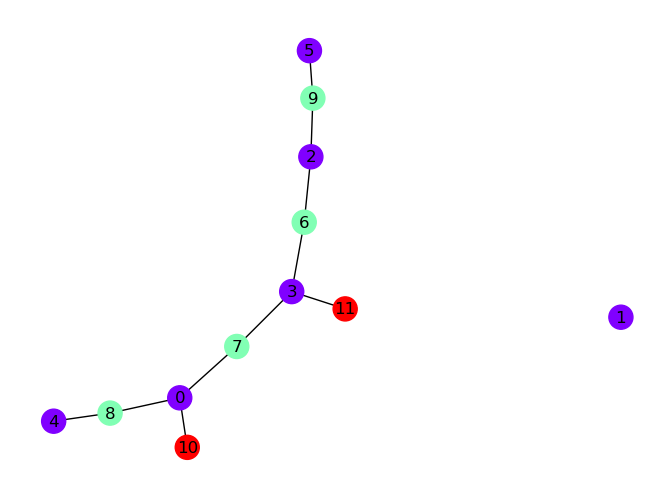

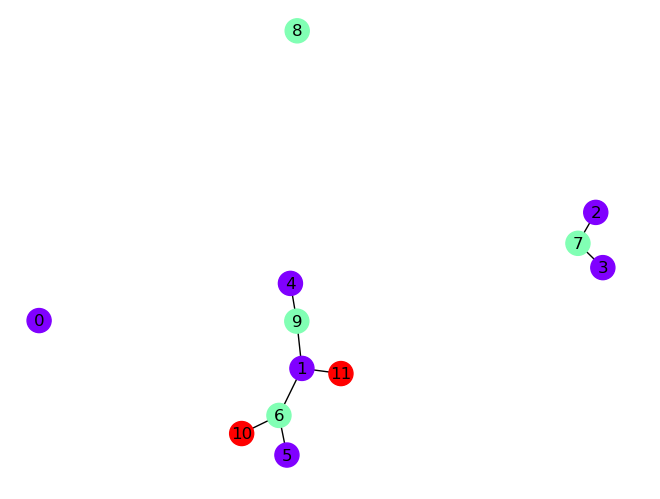

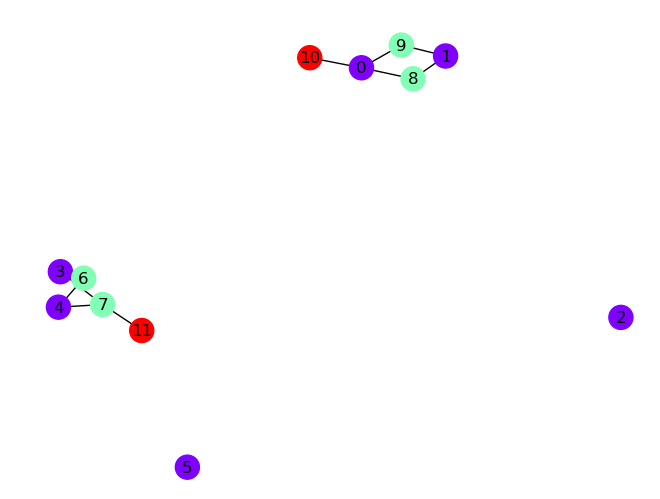

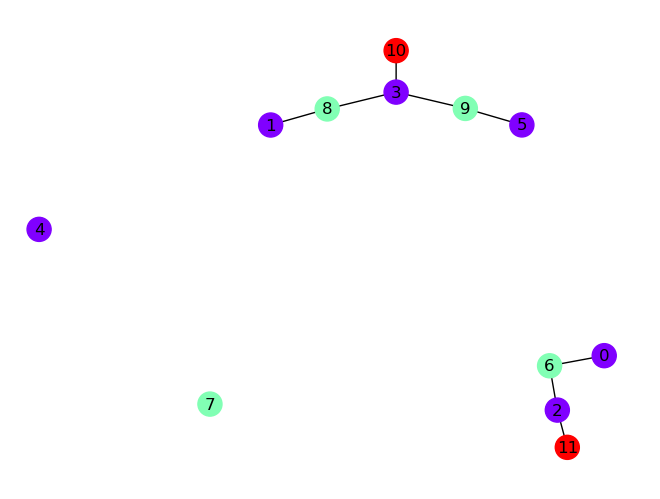

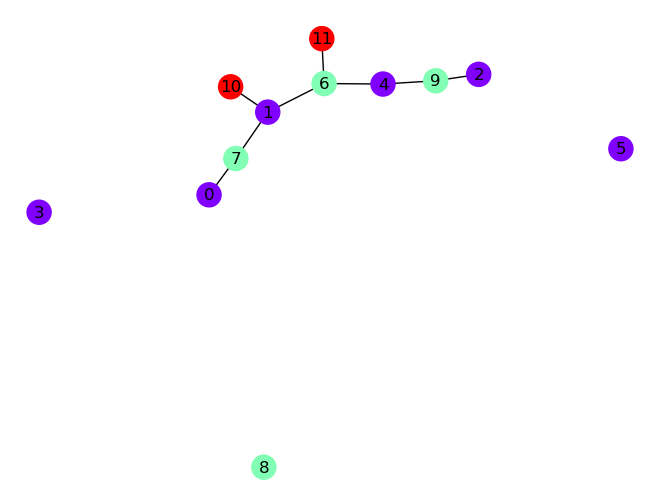

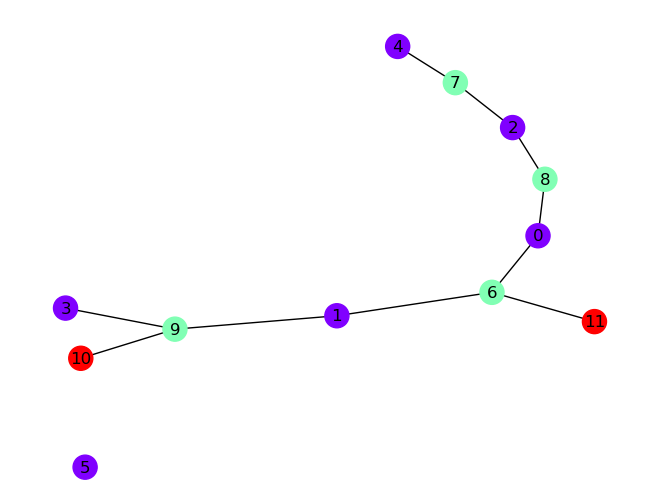

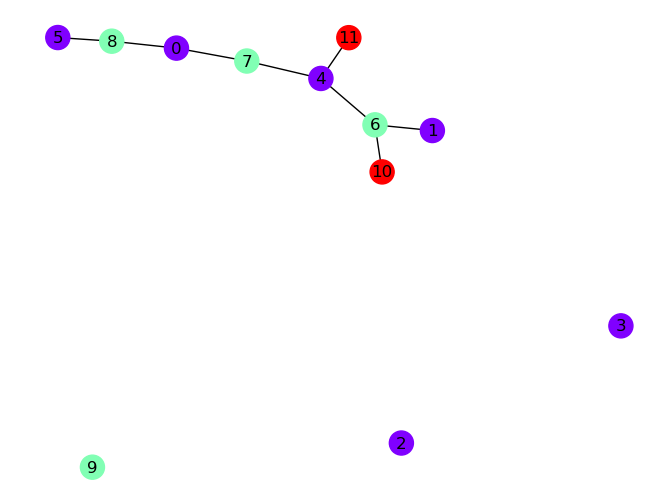

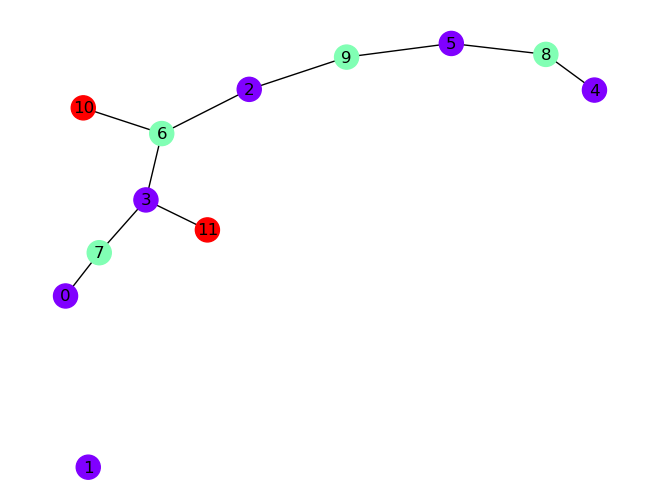

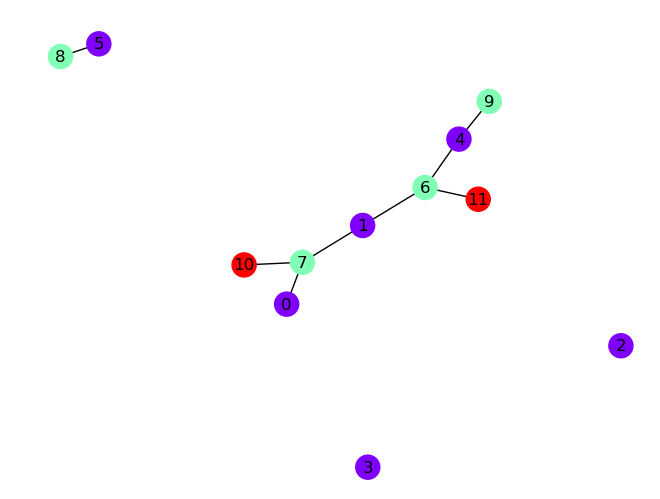

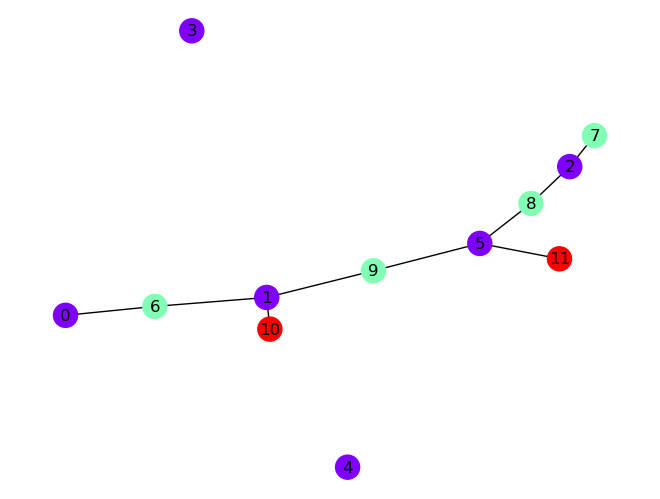

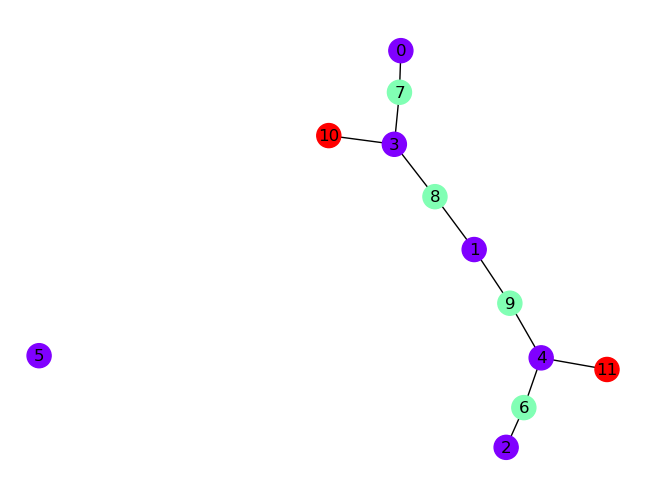

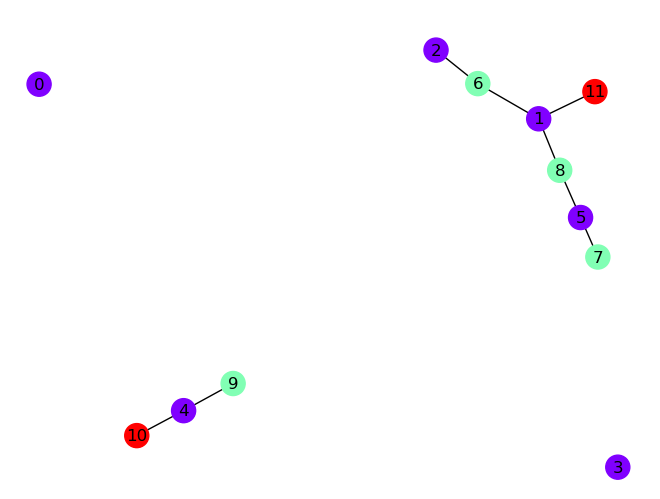

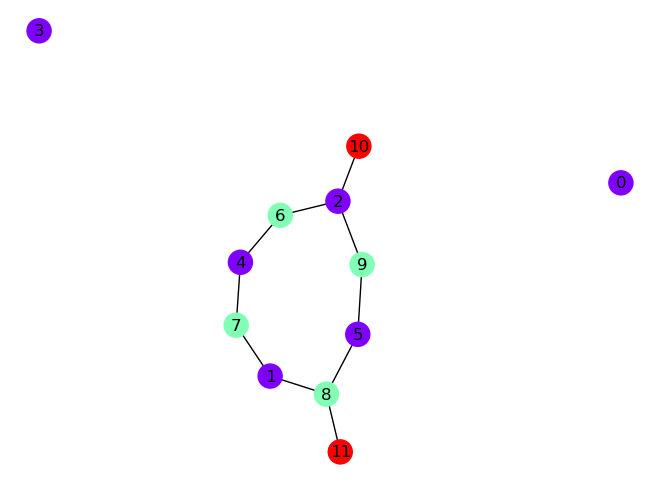

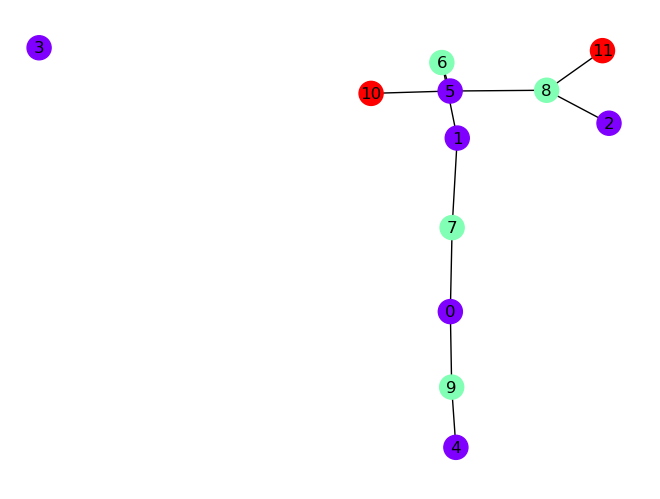

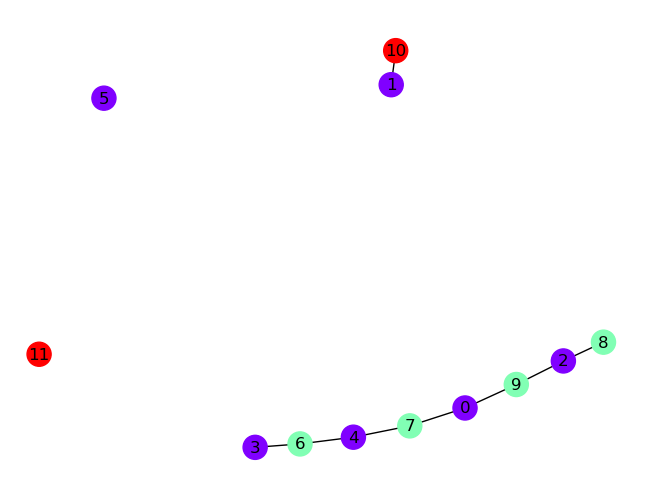

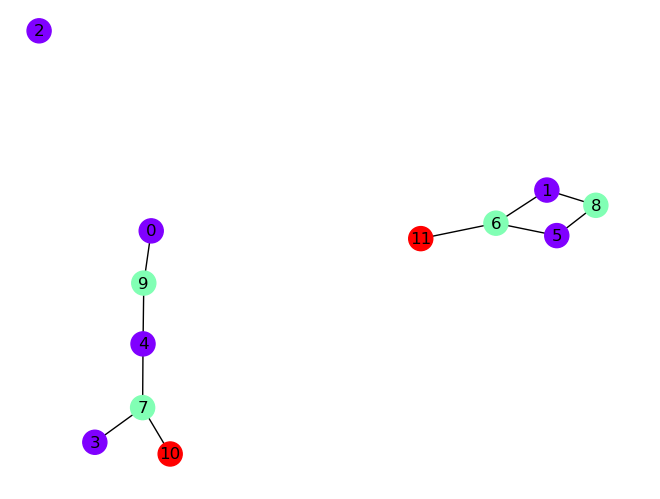

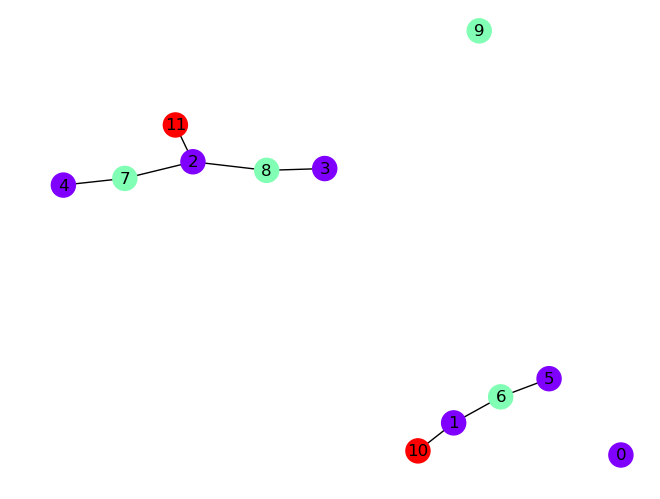

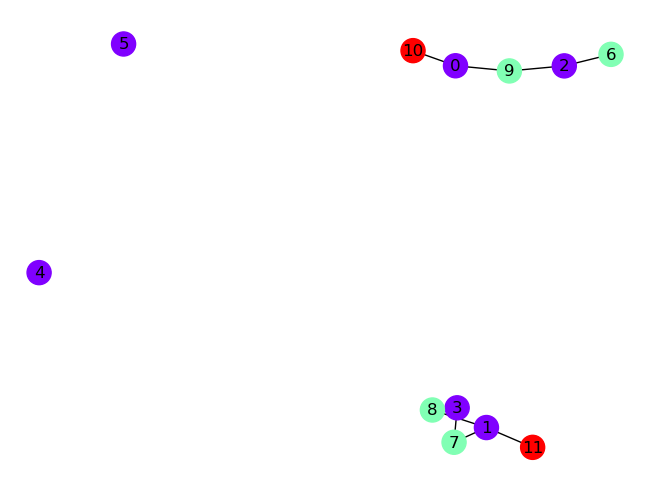

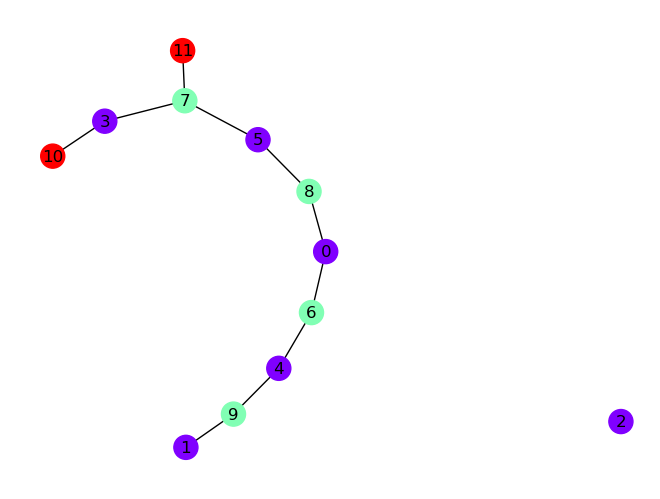

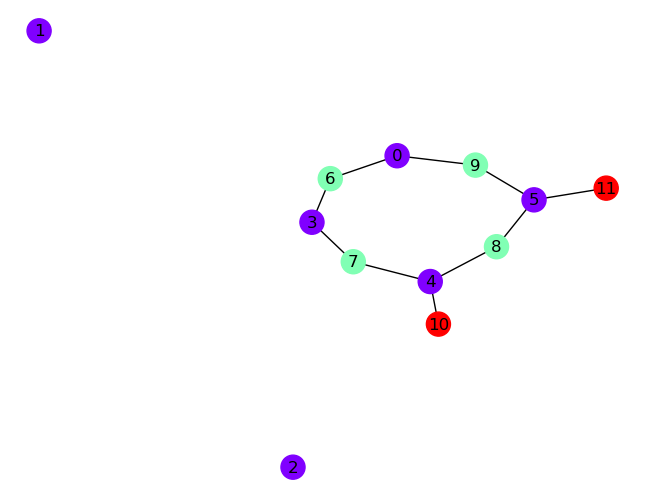

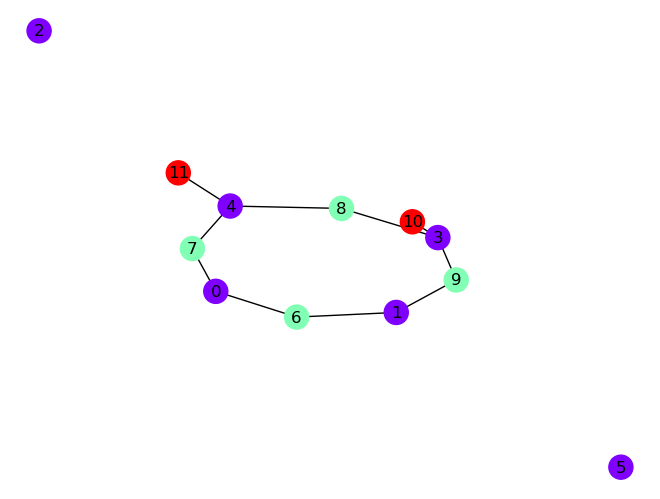

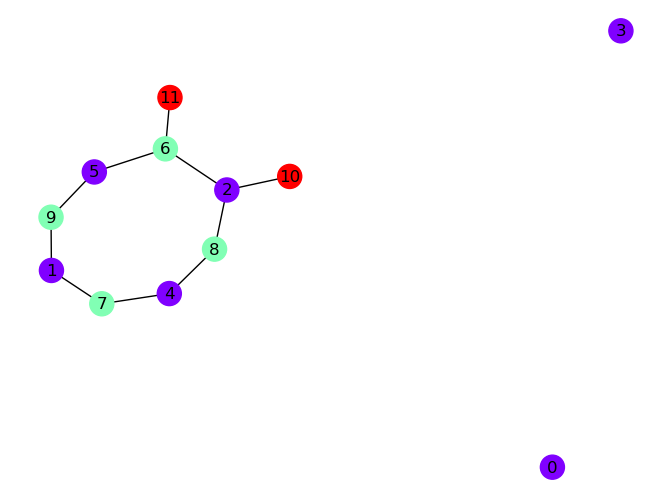

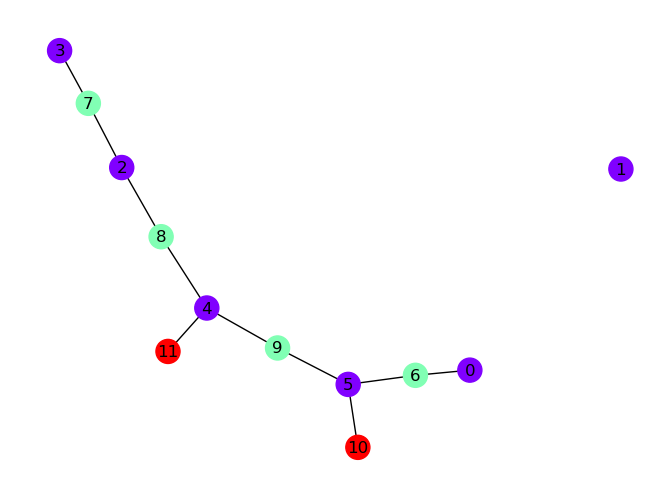

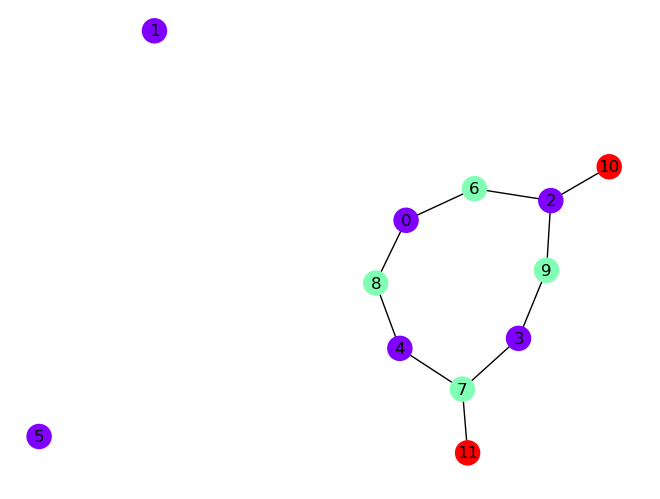

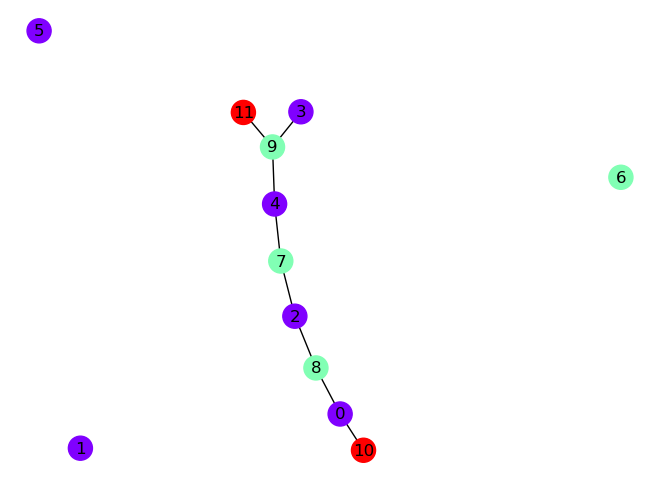

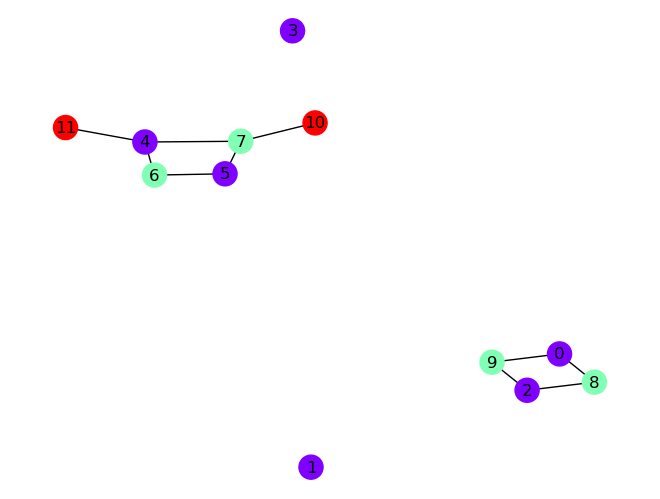

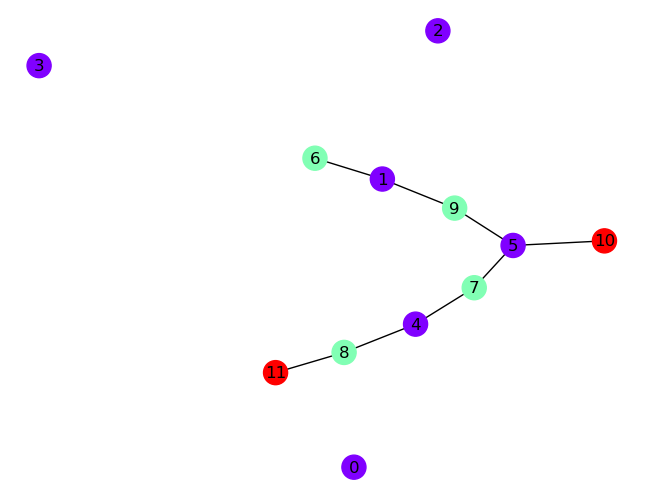

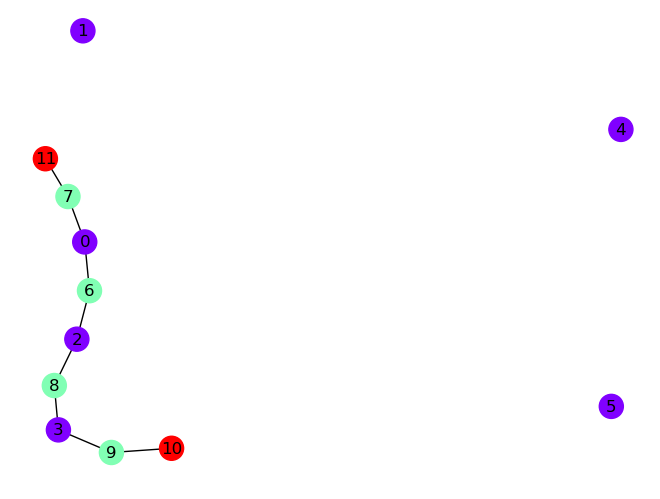

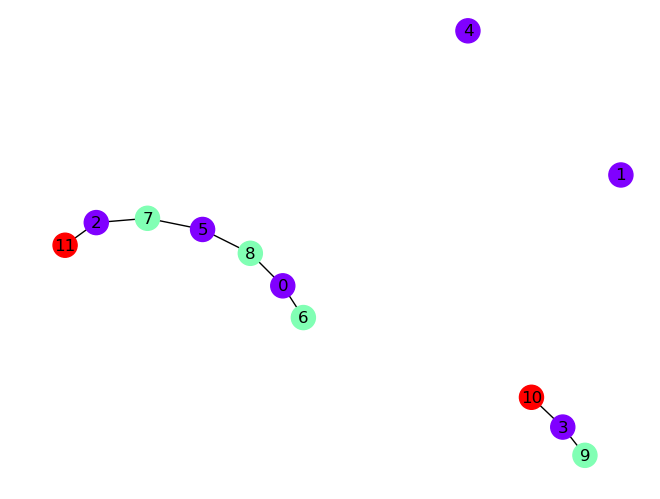

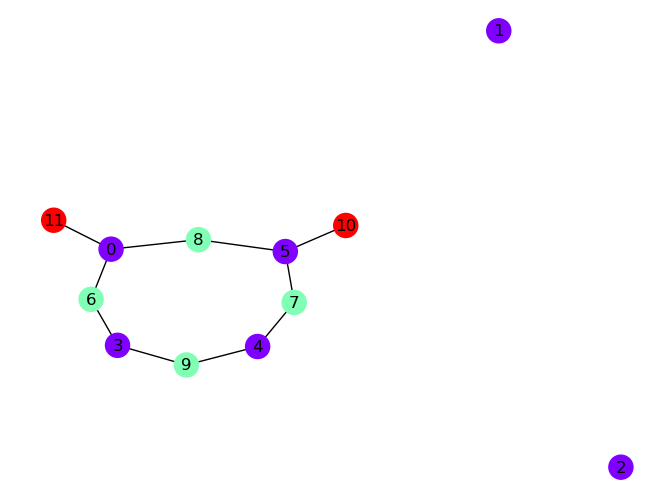

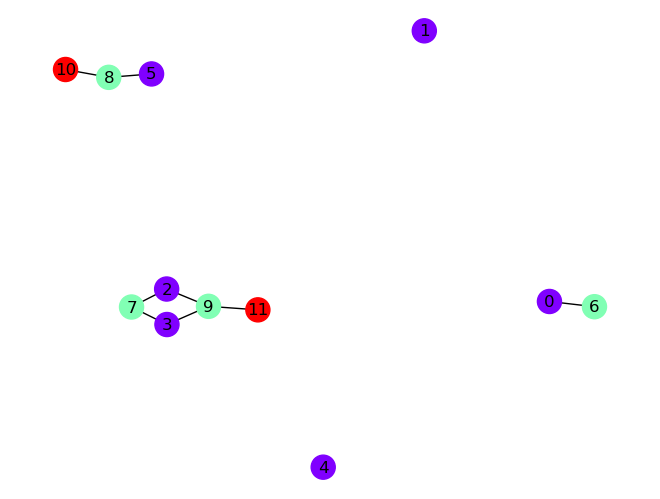

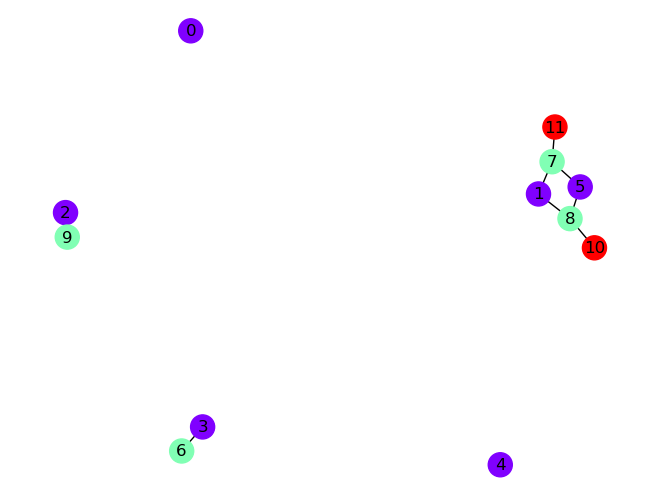

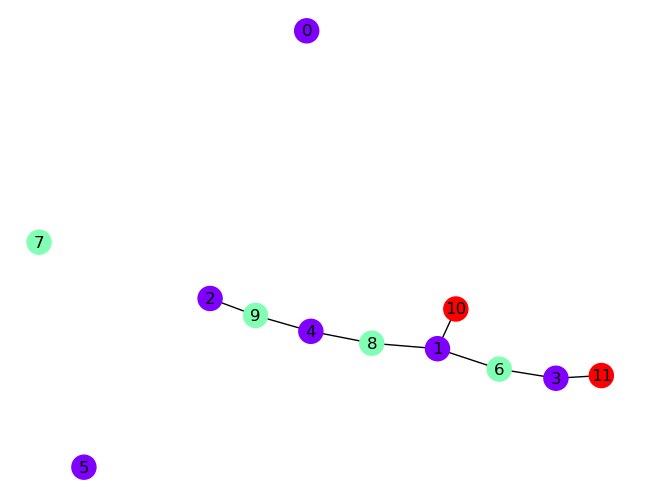

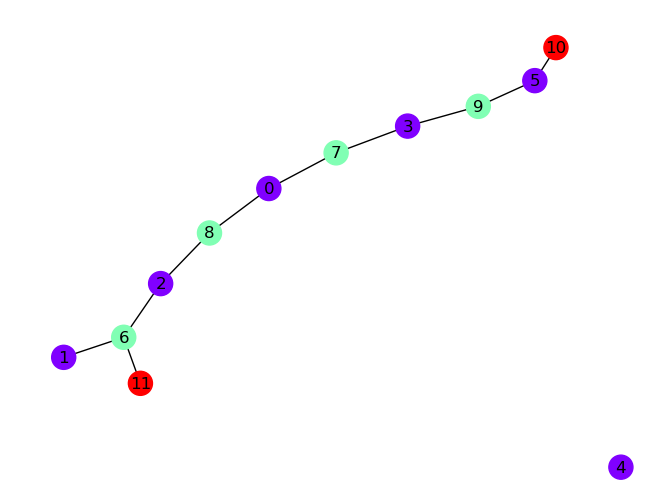

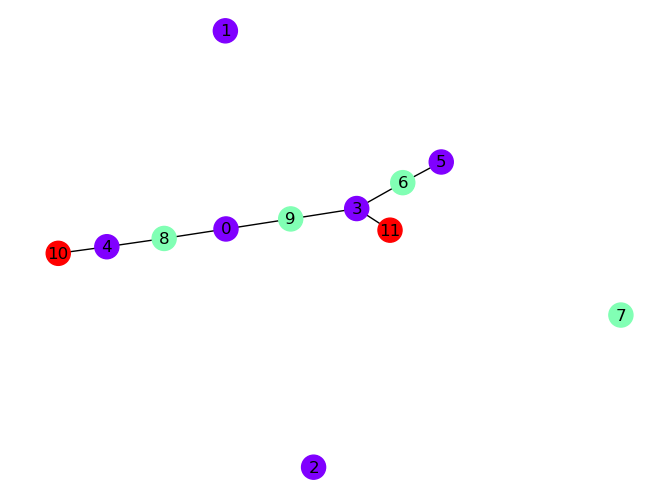

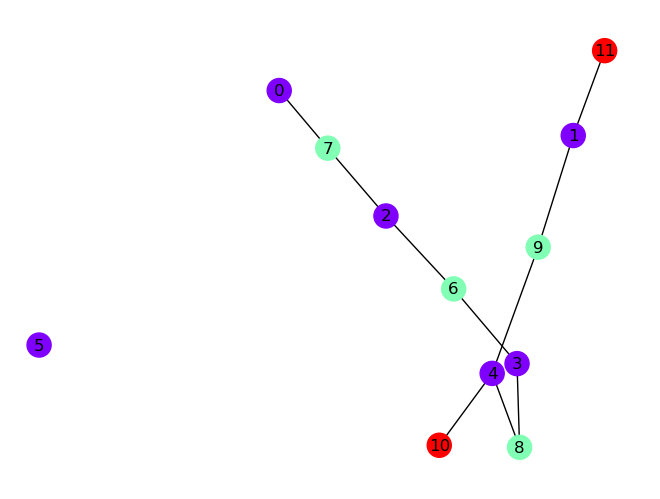

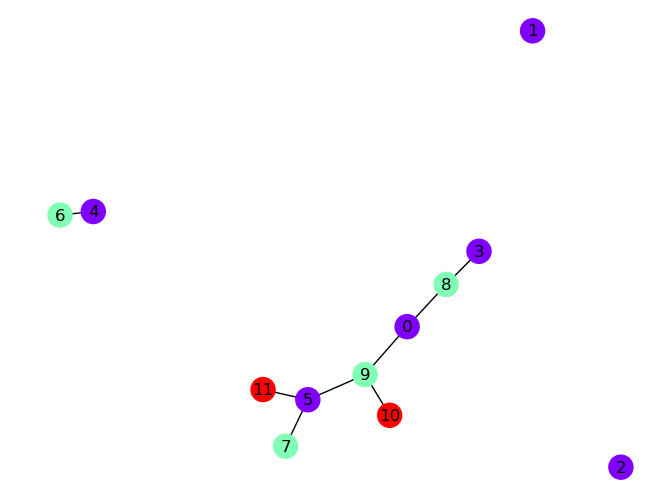

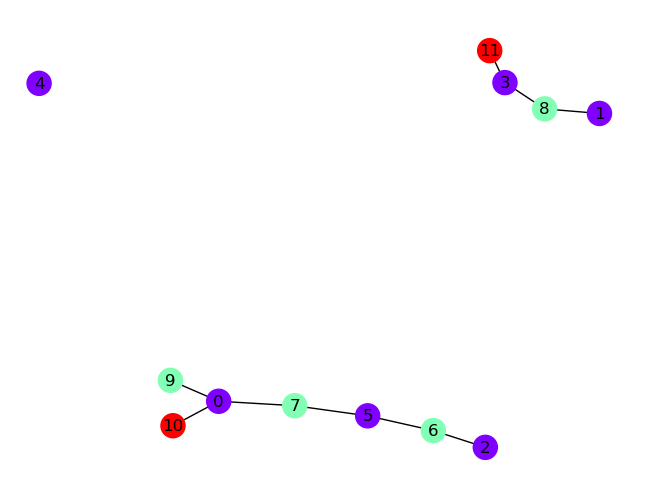

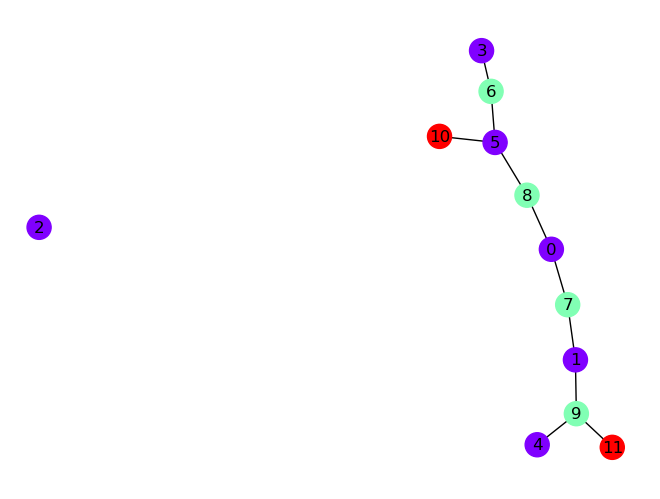

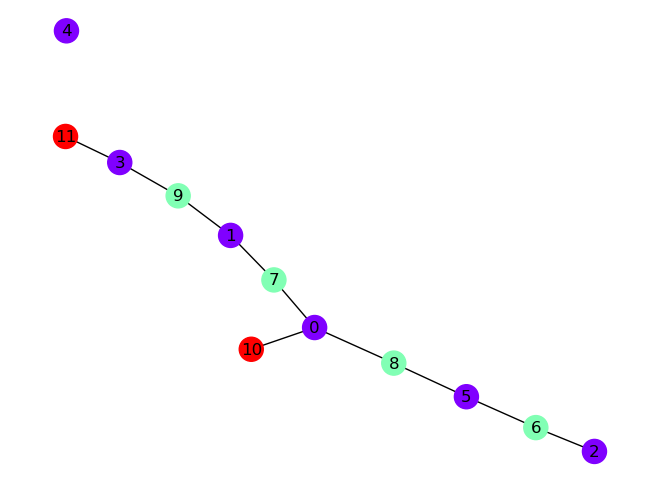

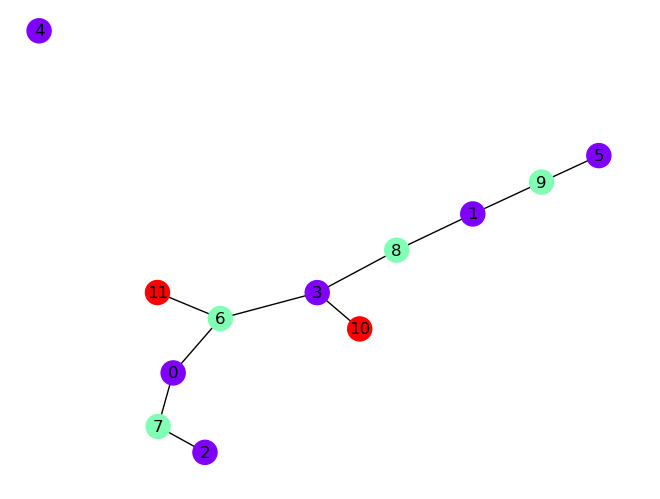

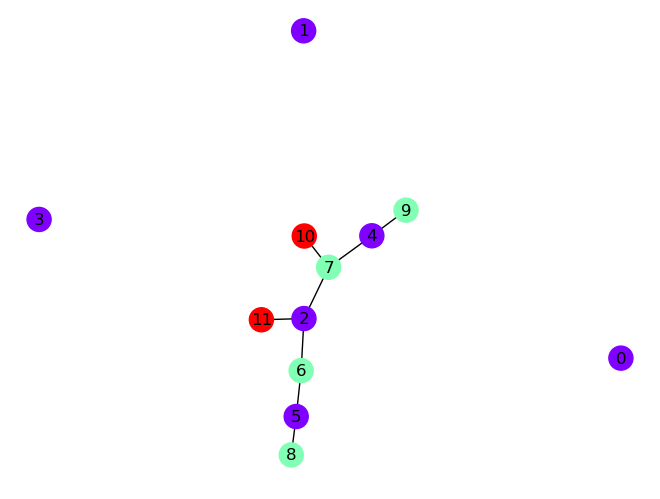

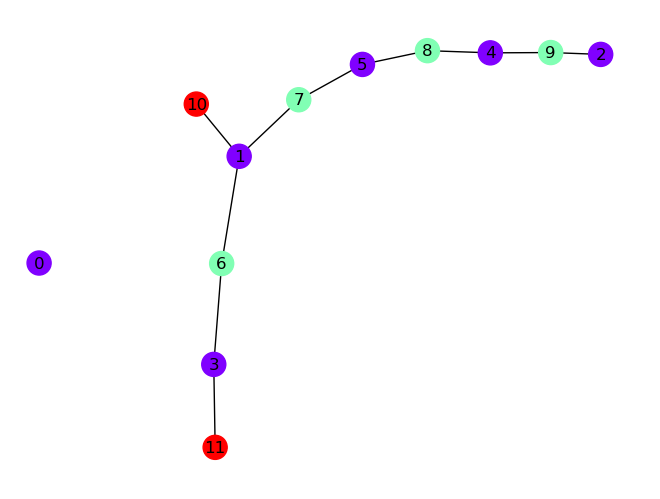

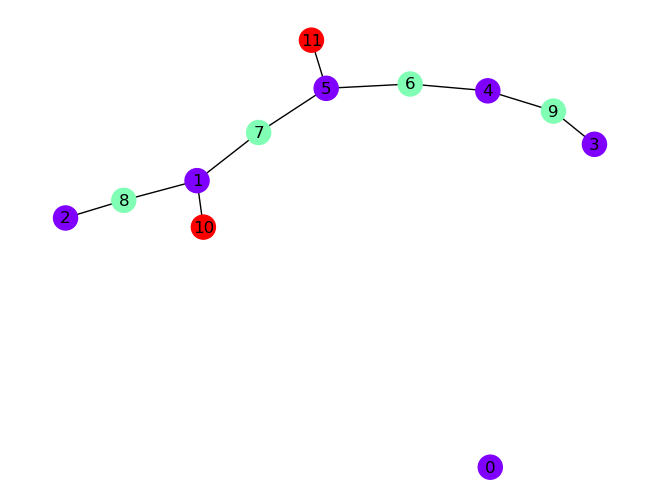

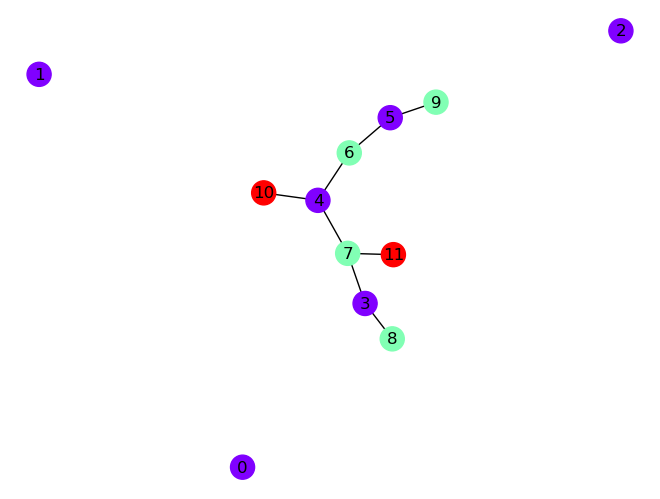

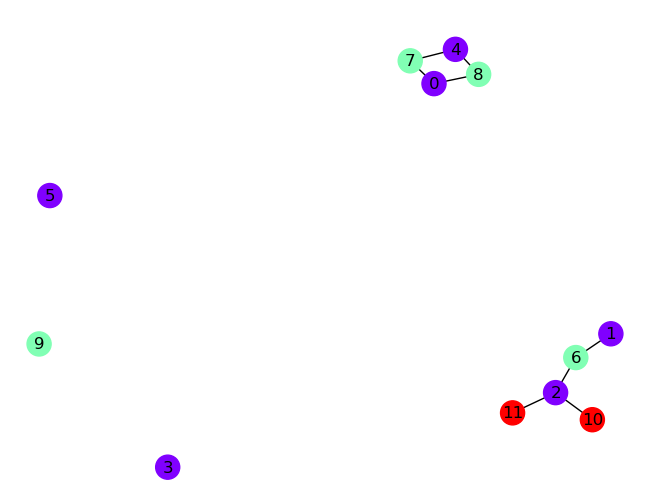

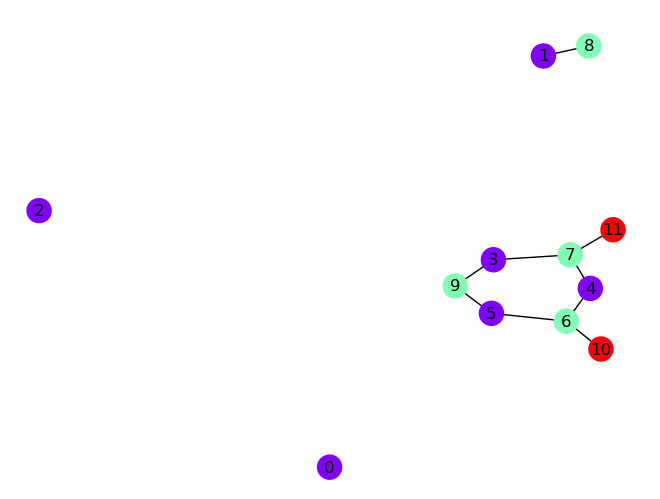

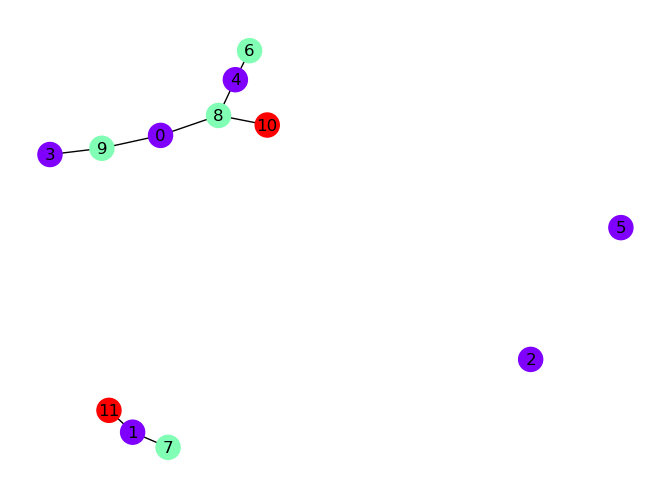

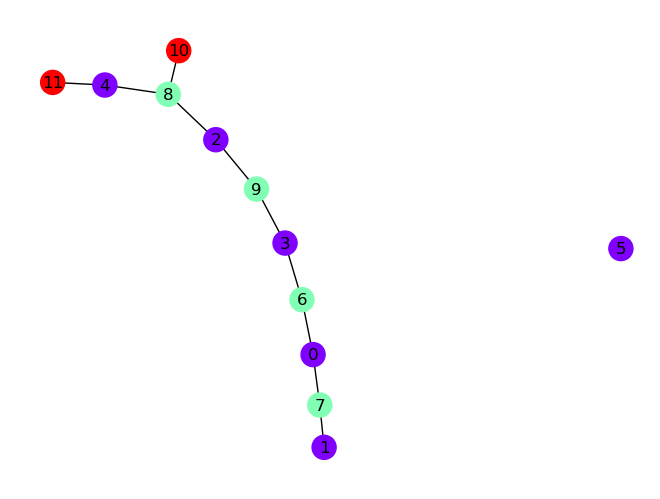

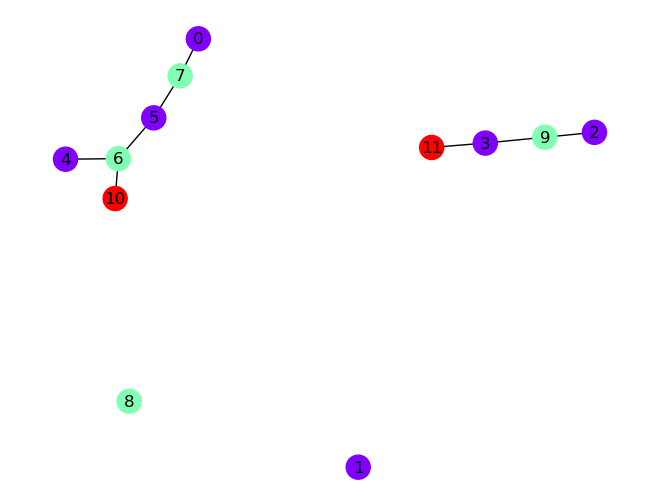

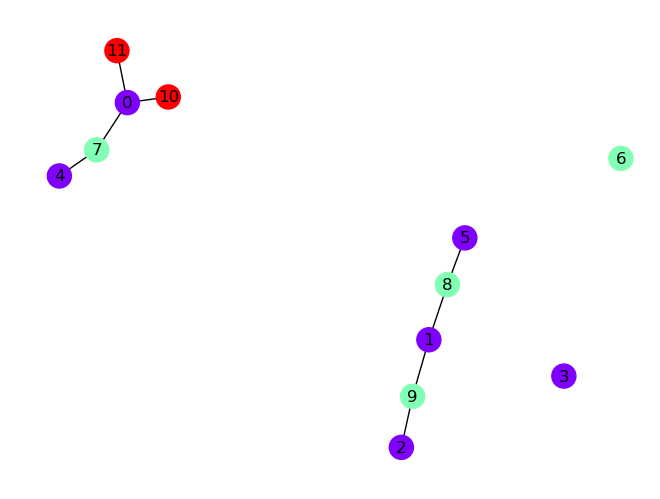

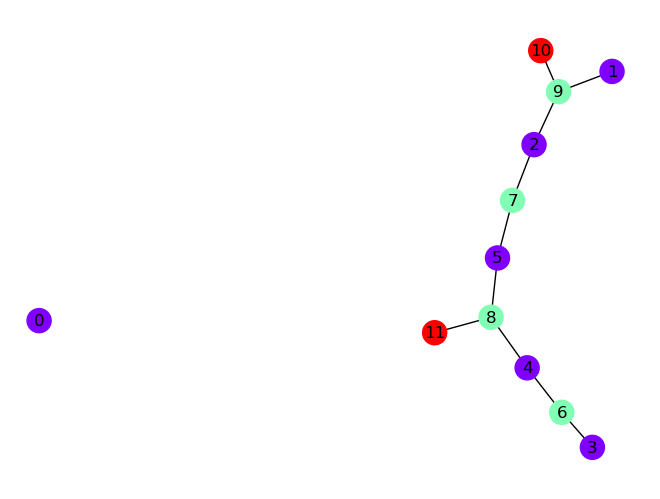

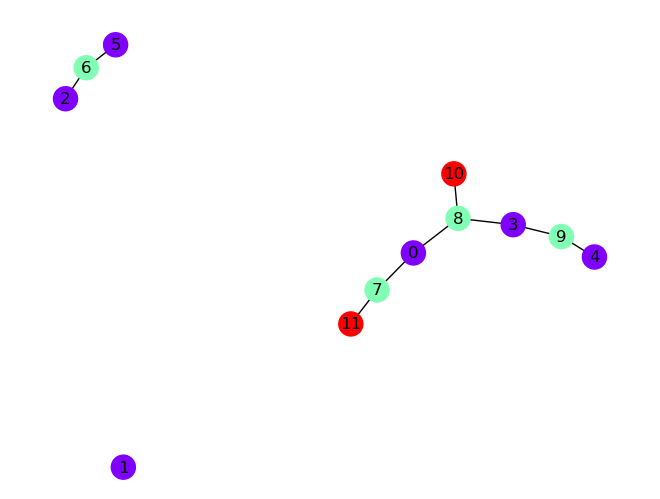

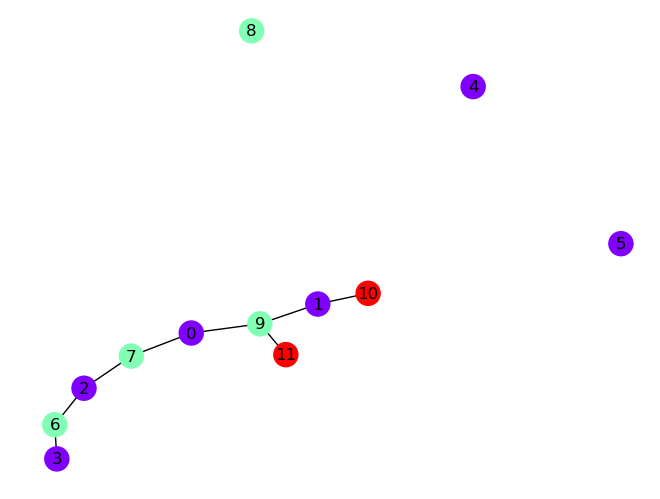

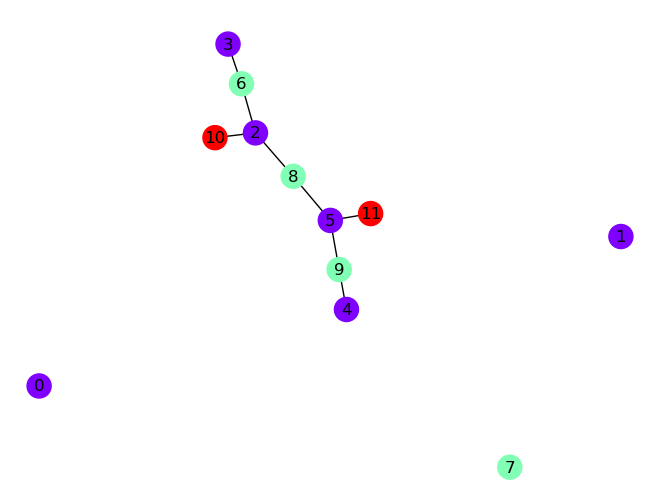

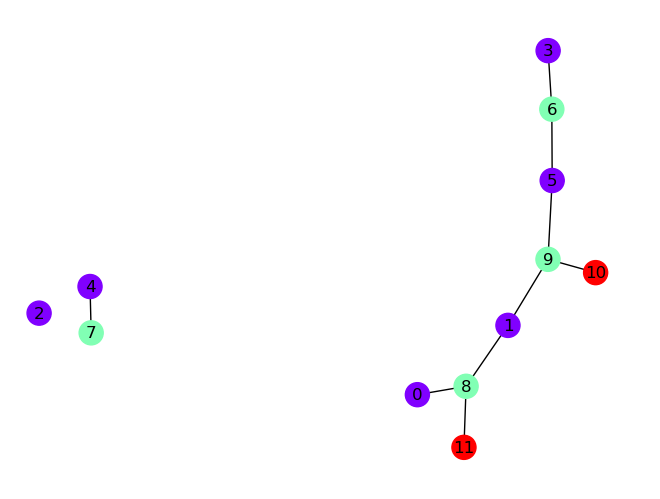

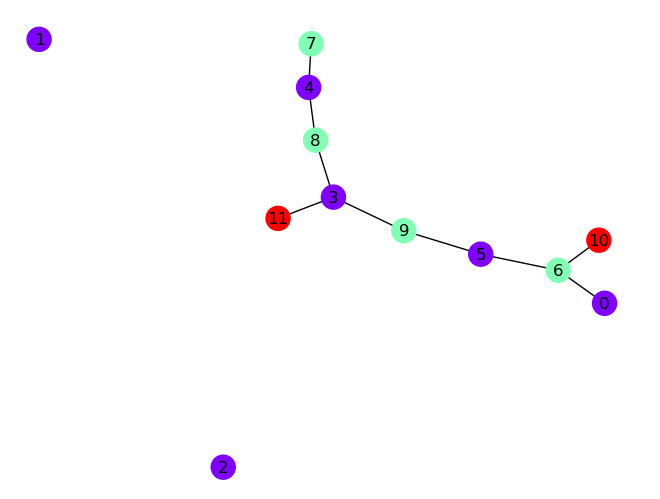

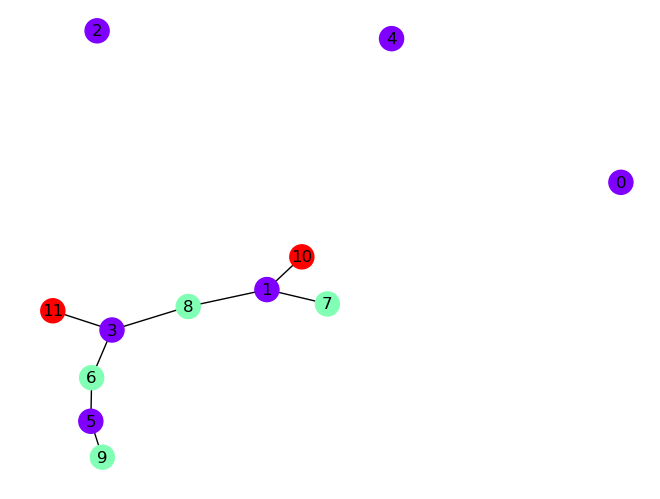

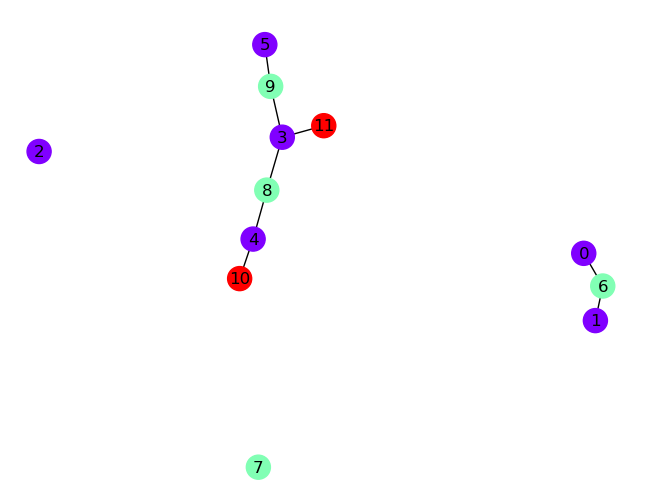

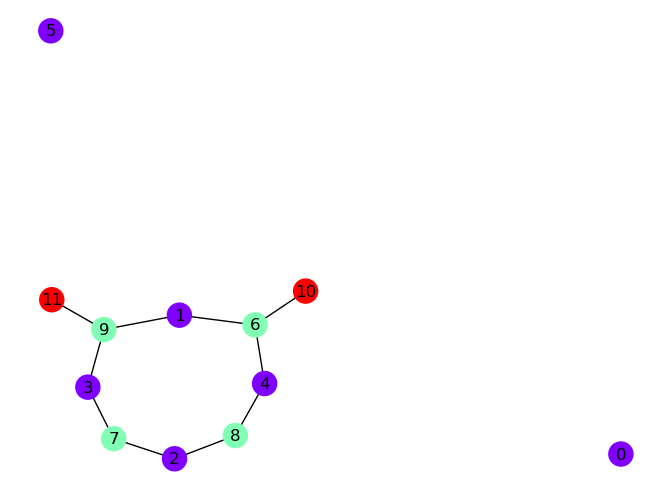

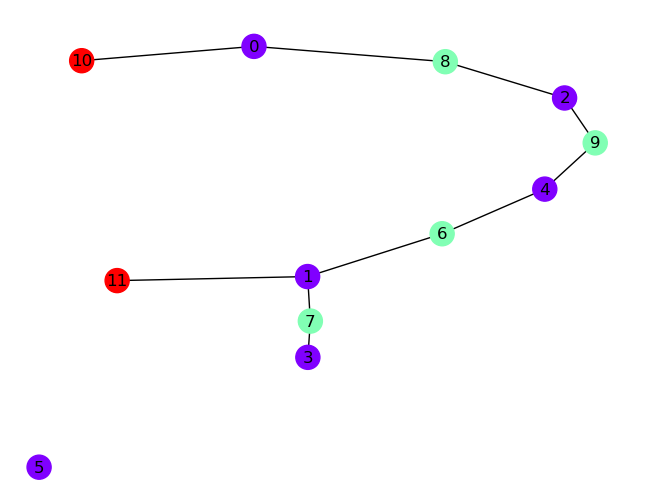

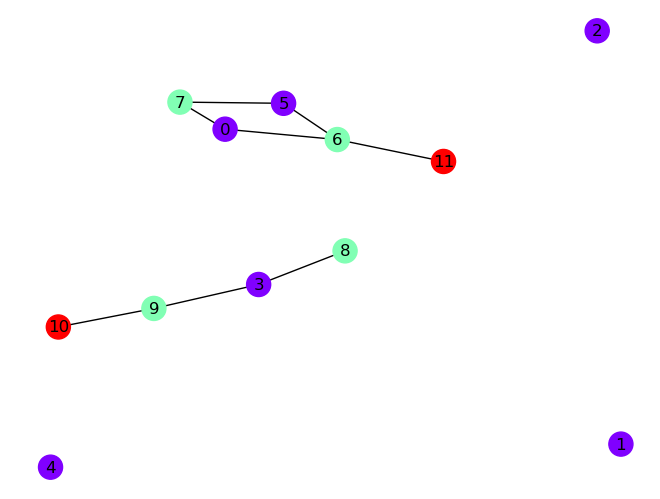

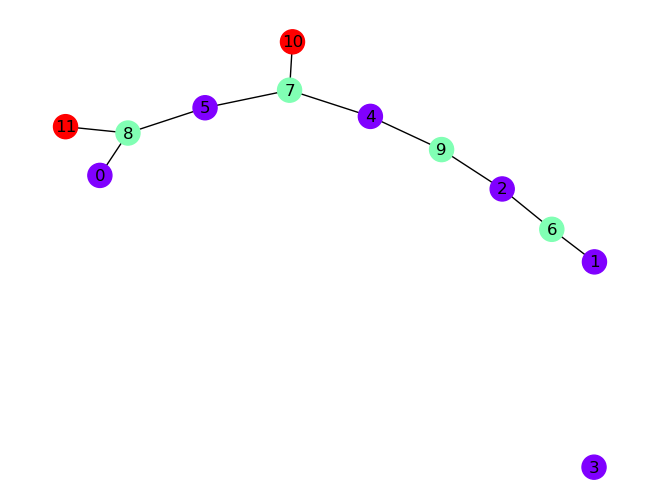

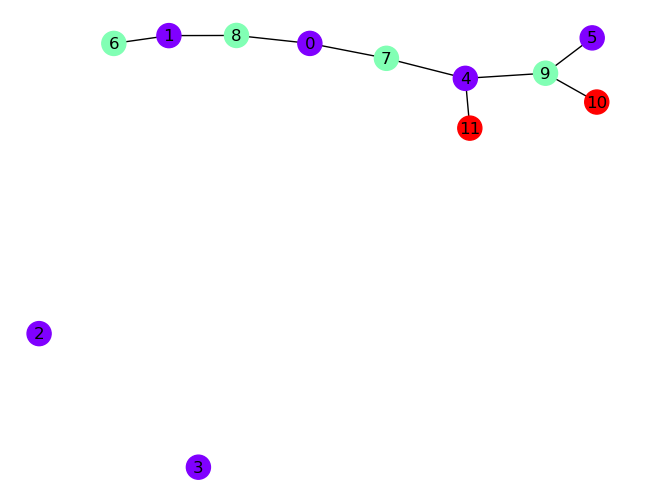

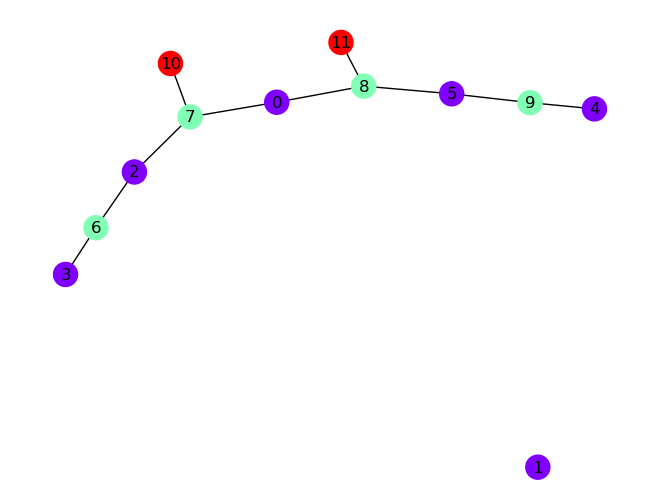

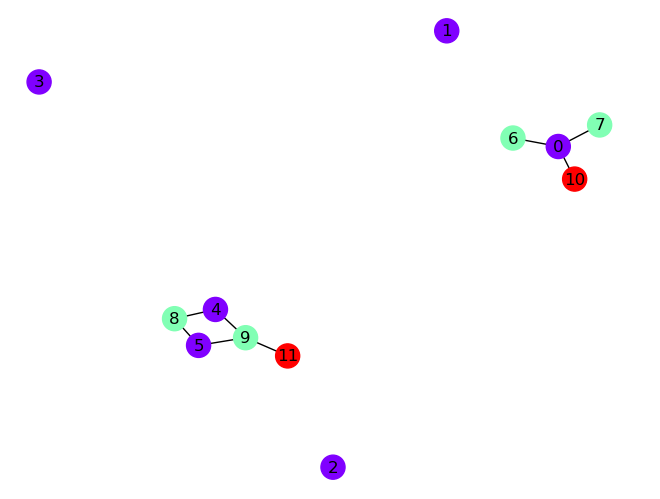

In [12]:
for i in range(100):
    at.draw_network(nx.from_numpy_array(A[:,:,i]),X,with_labels=True)
    plt.show()

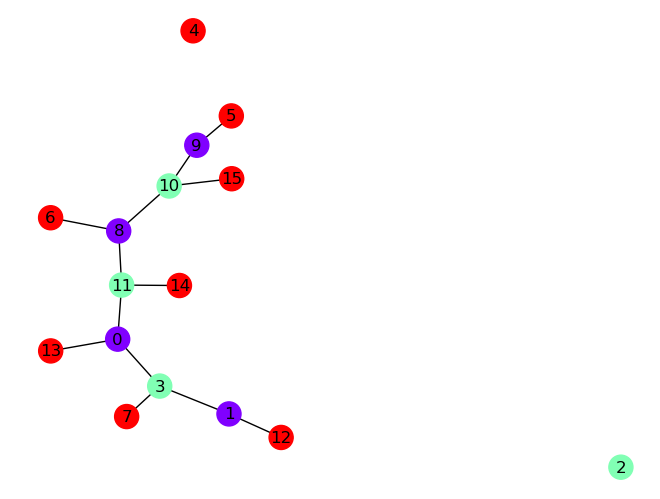

In [199]:
at.draw_network(nx.from_numpy_array(A[:,:,100]),X,with_labels=True)

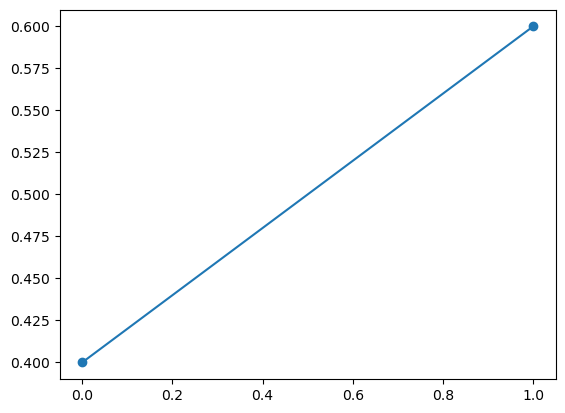

In [3]:
p, samples = at.prob_dist(X,O,capacity)
plt.plot(np.arange(len(samples)),p,'-o')


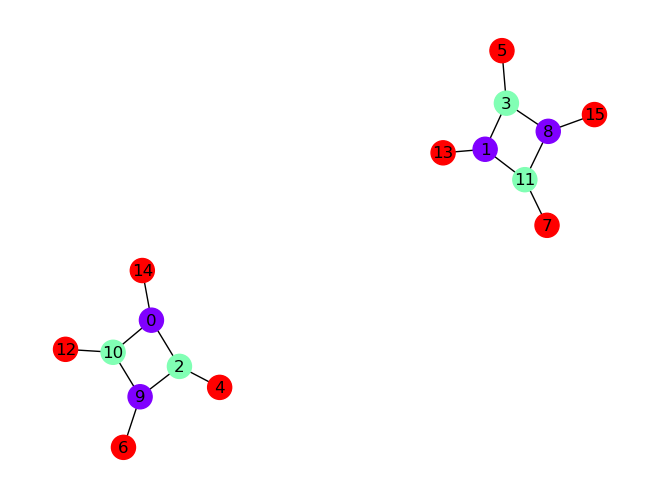

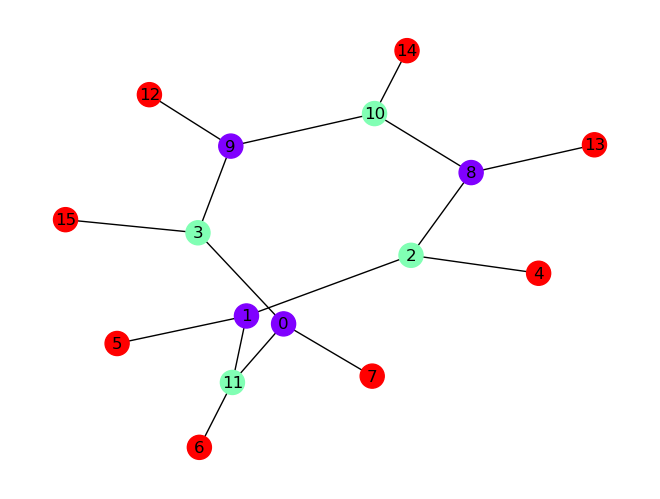

In [5]:
for i in range(len(samples)):
    at.draw_network(samples[i],X,with_labels=True)
    plt.show()

In [10]:
labels = X.argmax(axis=1)
A = nx.to_numpy_array(graphs[0])
prob = 1
for i in range(len(X)):
    for j in range(i,len(X)):
        pij = np.min([O[labels[i],labels[j]],O[labels[j],labels[i]]]) / np.max([X.sum(axis=0)[labels[i]],X.sum(axis=0)[labels[j]]])
        prob *= pij**(A[i,j])*(1-pij)**(1-A[i,j])

0


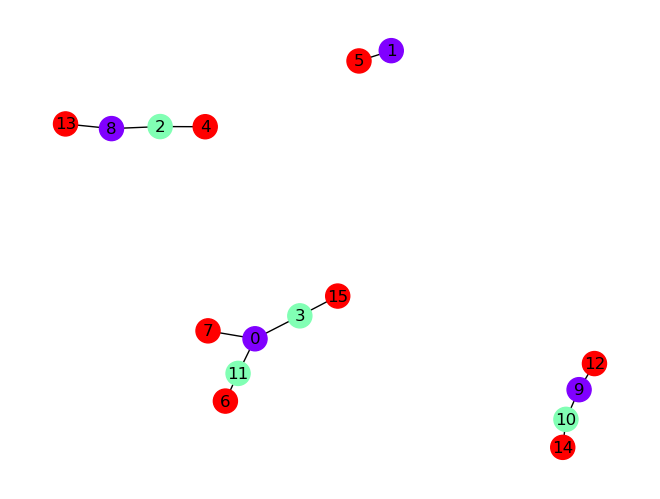

0 {0, 3, 6, 7, 11, 15}


KeyboardInterrupt: 

In [6]:
nx.set_edge_attributes(samples[1],1,'capacity')
comp, p, entropy = at.identify_sub_layers(samples[1],[0,1,2],X,O,capacity)

In [14]:
node_order = [0,1,2]
cut_edges = at.label_pairs(subset,X,node_order[0])

In [10]:
k = {0,3,6,7,11,15}
at.prob_dist(X[list(k)],O,capacity)

KeyboardInterrupt: 

In [12]:
X[list(k)].sum(axis=0)

array([1, 2, 3])

In [13]:
g = nx.Graph()
g.add_edge(0,3)
g.add_edge(0,11)
g.add_edge(11,6)
g.add_edge(3,15)
g.add_edge(0,7)

In [15]:
g = nx.relabel_nodes(g,{0:0,3:1,6:2,7:3,11:4,15:5})

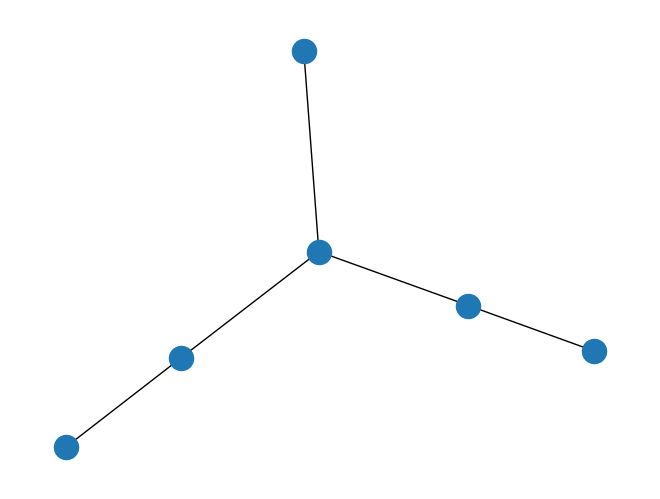

In [29]:
labels = X[list(k)].argmax(axis=1)
A = nx.to_numpy_array(g)
prob = 1
for i in range(len(list(k))):
    for j in range(i,len(list(k))):
        pij = np.min([O[labels[i],labels[j]],O[labels[j],labels[i]]]) / np.max([X.sum(axis=0)[labels[i]],X.sum(axis=0)[labels[j]]])
        Aij = g.has_edge(i,j)
        if Aij is True:
            Aij = 1
        else:
            Aij = 0
        print(pij, Aij, i,j)
        prob *= pij**(Aij)*(1-pij)**(1-Aij)

0.0 0 0 0
0.5 1 0 1
0.125 0 0 2
0.125 1 0 3
0.5 1 0 4
0.125 0 0 5
0.0 0 1 1
0.125 0 1 2
0.125 0 1 3
0.0 0 1 4
0.125 1 1 5
0.0 0 2 2
0.0 0 2 3
0.125 1 2 4
0.0 0 2 5
0.0 0 3 3
0.125 0 3 4
0.0 0 3 5
0.0 0 4 4
0.125 0 4 5
0.0 0 5 5


In [31]:
prob*(3*2*2*1)

0.0026296600699424744

In [28]:
g.nodes()

NodeView((0, 1, 4, 2, 5, 3))

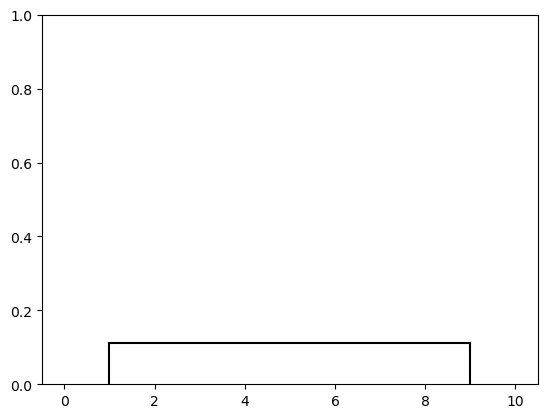

In [20]:
x = np.linspace(1,9,100)
# plt.plot(x,np.exp(-x),'-',color='k')
plt.plot(x,1/9*np.ones_like(x),'-',color='k')
plt.xlim(-.5,10.5)
plt.ylim(0,1)
plt.vlines([1,9],0,1/9,linestyles='-',color='k')
# plt.xticks([],[])
# plt.yticks([],[])
plt.show()